# Preperations - Run everything here first 
- pip installs
- imports
- connect to google drive
- init paths (run your own)
- functions defs


In [ ]:
!pip install yfinance
!pip install TwitterAPI
!pip install vaderSentiment
!pip install timedelta
!pip install flair

 # imports

In [ ]:
import csv
import math
import pandas as pd
import numpy as np
import datetime
import timedelta
import time
import io
# import plotly.graph_objects as go
# from dateutil import parser
# from sklearn import linear_model
#from transformers import BertTokenizer, BertForSequenceClassification
# from textblob import TextBlob # sentiment score
# from sklearn.model_selection import train_test_split
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # sentiment score
# analyzer = SentimentIntensityAnalyzer()
# pd.set_option('display.max_colwidth', None)

# needs to be fixed
# import flair # sentiment score
# flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

# finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
# tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

#Google Drive Init

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Paths Init

In [ ]:
users_path = '/content/drive/MyDrive/Final Project/Data/Self Collected/users_with_eng_v5(with_replies).csv'
tweets_path = "/content/drive/MyDrive/Final Project/Data/From the Web/TweetsAboutTopCompanies/Tweet.csv"
tweets_2019_path = "/content/drive/MyDrive/Final Project/Data/From the Web/TweetsAboutTopCompanies/tweets_2019.csv"
filteredTweetsWithFlair_path = "/content/drive/MyDrive/Final Project/Data/From the Web/TweetsAboutTopCompanies/tweets_2019_flairSentiment.csv"
stocks_path = "/content/drive/MyDrive/Final Project/Data/From the Web/StockMarketData/stocks_2015_2020.csv"
stocks_2019_path = "/content/drive/MyDrive/Final Project/Data/From the Web/StockMarketData/stocks_2019.csv"
prepared_stocks_2019_path = "/content/drive/MyDrive/Final Project/Data/From the Web/StockMarketData/prepared_stocks_2019_v1.csv"

# *Function* Defs

In [ ]:
# auths
def connectToTwitterAPI1():
  import tweepy # tweeter API
  from datetime import datetime, timedelta

  consumer_key = 'mymakG2knztQ2GYaTNaRGTIOi'
  consumer_secret = 'lGXmXu9K7DQftUjvVempNg1vGjS362zbKo7p12yaa5RrBelIlj'
  access_token = '561299890-kjoCtIBYvSHeIVfhYEbHfNXHAqVklnMze2Wce1JT'
  access_token_secret = 'U1fR9nx24H1Eo3dvlLYO9LhDxwYWWZ5x2JEltgA4xUy6o'

  auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_token, access_token_secret)

  return tweepy.API(auth)

def connectToTwitterAPI2():
  from TwitterAPI import TwitterAPI, TwitterOAuth, TwitterRequestError, TwitterConnectionError, TwitterPager
  consumer_key = 'mymakG2knztQ2GYaTNaRGTIOi'
  consumer_secret = 'lGXmXu9K7DQftUjvVempNg1vGjS362zbKo7p12yaa5RrBelIlj'
  access_token = '561299890-kjoCtIBYvSHeIVfhYEbHfNXHAqVklnMze2Wce1JT'
  access_token_secret = 'U1fR9nx24H1Eo3dvlLYO9LhDxwYWWZ5x2JEltgA4xUy6o'
  return TwitterAPI (consumer_key, consumer_secret, access_token,
  access_token_secret, api_version='2')

In [ ]:
i = 0
while i < 3:
  

Prepare Stocks

In [ ]:
# def getAvg(x,y):
#   return (x+y)/2

# def scalePriceDiff(stocks_df):
#   temp_stocks = stocks_df.reset_index(drop=True)
#   temp_stocks['price_difference_Scaled'] = [0 for i in range(len(temp_stocks))]
#   x_min = temp_stocks['price_difference'].min()
#   x_max = temp_stocks['price_difference'].max()
#   temp_stocks['price_difference_Scaled'] = [MinMaxNegOneToOne(x, x_min, x_max) for x in temp_stocks['price_difference']]
#   return temp_stocks


def getPriceDiff(stocks_df):
  temp_stocks = stocks_df.reset_index(drop=True)
  temp_stocks['price_difference'] = [0.0 for i in range(len(temp_stocks))]
  for i in range(len(temp_stocks)):
    if i == 0:
      pass
    else:
      # Next Close - Today Close
      today = float(temp_stocks['Close'][i])
      yesterday = float(temp_stocks['Close'][i-1])
      # try getAvg(high,low)
      temp_stocks['price_difference'][i] = today - yesterday
  temp_stocks.drop([0],inplace=True)
  temp_stocks.reset_index(drop=True, inplace=True)
  return temp_stocks

def removeDays(stocks_df):
  temp_stocks = stocks_df
  # get previous stock date --> 
  temp_stocks["Date"] = [removeDay(date) for date in temp_stocks["Date"]]
  temp_stocks['Date'] = pd.to_datetime(temp_stocks['Date'], unit='s').dt.strftime('%d/%m/%Y')
  temp_stocks.reset_index(drop=True, inplace=True)
  return temp_stocks

def splitStocksDF(stocks_df):
  df = stocks_df
  dfs = [df[df['ticker_symbol'] == 'AAPL'].reset_index(drop=True),
       df[df['ticker_symbol'] == 'AMZN'].reset_index(drop=True),
       df[df['ticker_symbol'] == 'GOOG'].reset_index(drop=True),
       df[df['ticker_symbol'] == 'GOOGL'].reset_index(drop=True),
       df[df['ticker_symbol'] == 'MSFT'].reset_index(drop=True),
       df[df['ticker_symbol'] == 'TSLA'].reset_index(drop=True)]
  return dfs

def prepareStocks(stocks):
  temp_stocks = stocks[['ticker_symbol', 'Date', 'Open', 'Close']]

  temp_stocks = removeDays(temp_stocks)
  print("days removed")

  dfs = splitStocksDF(temp_stocks)
  print("dfs splitted")

  for i in range(len(dfs)):
    print('---' + dfs[i]['ticker_symbol'][0] +'---')

    dfs[i] = getPriceDiff(dfs[i])
    print("got price diff")

    #dfs[i] = scalePriceDiff(dfs[i]) unneccesary
    #print('scaled price diff (Min Max (-1..1)')
  temp_stocks = pd.concat(dfs).reset_index(drop=True)

  # Using only "Up" and "Down" Predictions
  temp_stocks["behaviour"] = [-1 if x < 0 else 1 for x in temp_stocks['price_difference']]
  #temp_stocks["behaviour_AfterScaled"] = [-1 if x < 0 else 1 for x in temp_stocks['price_difference_Scaled']]

  return temp_stocks


Filtering

In [ ]:
def filterTweets(tweets):
  """
  naive filtering based on comment+liikes+retweets < 25
  also gets rid of sentiments=0
  """
  print('len before', len(tweets))
  temp_tweets = tweets[tweets['comment_num'] + tweets['retweet_num'] + tweets['like_num'] > 25]
  temp_tweets = temp_tweets[temp_tweets['Compound'] != 0]
  temp_tweets.reset_index(drop=True, inplace=True)
  print('len after', len(temp_tweets))
  return temp_tweets

def filterTweets_2nd(tweets, threshold = 0.5):
  """
  filter based on user score -> less than the threshold
  """
  print('len before', len(tweets))
  # tweets should be scaled
  temp_tweets = tweets[tweets['User_Score'] >= threshold]
  #temp_tweets = tweets[tweets['User_Score'] <= -threshold]
  temp_tweets.reset_index(drop=True, inplace=True)
  print('len after', len(temp_tweets))
  return temp_tweets

def filterUsers(users, follower_threshold):
  """
  -- 1.remove none computed eng score
  -- 2. removes users with less than num_followers 
  """
  df = users
  to_remove = []
  print("len before = " + str(len(df)))
  for i in range(len(df)):
    try:
      df['eng_score'][i] = float(df['eng_score'][i])
    except ValueError as ex:
      to_remove.append(i)
      print(ex)
    except: 
      print('Problem getting eng_score at index', i)

  for i in range(len(df)):
    if df['eng_score'][i] == math.inf:
      to_remove.append(i)
    if df['followers_count'][i] < follower_threshold:
      to_remove.append(i)

  df.drop(to_remove, inplace=True)
  df.reset_index(drop=True, inplace=True)
  print("len after = " + str(len(df)))
  return df

Scoring

In [ ]:
def isRetweet(tweet):
  if (len(tweet) >= 4):
    return (tweet[0]+tweet[1]+tweet[2]+tweet[3] == 'RT @')
  else: return False
  
def getTotalScoreToy(tweet_score, user_score, sentiment):
  return (tweet_score + user_score) * sentiment

def getUserEngagementToy(user_stats):
  return ((user_stats['user_total_likes'] + user_stats['user_total_retweets']) / user_stats['user_followers_num'])/user_stats['user_total_tweets']

def getTweetScoreToy(tweet):
  return float(df['retweet_num'][i] * 0.5) + (df['like_num'][i] * 0.25) + (df['comment_num'][i] * 0.25)  
#-----------------------

def getTweetScore(tweets_df):
  df = tweets_df
  df['Tweet_Score'] = [0.0 for i in range(len(df))]
  df['Tweet_Score'] = df['Tweet_Score'].astype(float)

  for i in range(len(df)):
    temp_tweet_score = (df['retweet_num'][i] * 0.5) + (df['like_num'][i] * 0.25) + (df['comment_num'][i] * 0.25)
    df['Tweet_Score'][i] += float(temp_tweet_score)
  return df

we

def getTotalScore(merged_df):
  df = merged_df
  df['Total_Score'] = [0.0 for i in range(len(df))]
  df['Total_Score'] = df['Total_Score'].astype(float)
  for i in range(len(df)):
    df['Total_Score'] = (df['User_Score'] + df['Tweet_Score']) * df['Compound']
  return df


# def getUserScore_SentimentBased(users_df):
#   df = users_df
#   user_scores = []
#   df['User_Score_SentimentBased'] = [0.0 for i in range(len(df))]
#   df['User_Score_SentimentBased'] = df['User_Score_SentimentBased'].astype(float)
#   for i in range(len(df)):
#     score = df['eng_score'][i] * df['Compound'][i]
#     user_scores.append(score)

#   df['User_Score_Scaled'] = minMaxCol(user_scores)
#   # min = user_scores.min()
#   # max = user_scores.max()
#   # for i in range(len(df)):
#   #   df['User_Score_Scaled'][i] = MinMax(user_score, min, max)
#   return df


#def getUserEngagement(user_tweets, user_followers_num):
#     total_tweets = len(user_tweets)
#     if (total_tweets == 0):
#       return False
#     total_eng = 0
#     total_likes = 0
#     total_retweets = 0

#     for tweet in user_tweets:
#       if isRetweet(tweet['text']):
#         total_tweets-=1
#       else:
#         total_likes += tweet['favorite_count']
#         total_retweets += tweet['retweet_count']

#       total_eng = ((total_likes+total_retweets)/user_followers_num)/total_tweets
#       return total_eng

# def scaleTweets(tweets_df):
#   df = tweets_df
#   min = df['Tweet_Score'].min()
#   max = df['Tweet_Score'].max()
#   for i in range(len(df)):
#     df['Tweet_Score_Scaled'][i] = MinMax(df['Tweet_Score'][i], min, max)
#   df.reset_index(drop=True, inplace=True)
#   return df

# def getUserScore(users_df):
#   df = users_df
#   df['User_Score'] = [0.0 for i in range(len(df))]
#   df['User_Score'] = df['User_Score'].astype(float)
#   df['User_Score'] = minMaxCol(df['eng_score'])
#   return df

Merge users stocks and tweets

In [ ]:
def getMerged(tweets_df, users_df, stocks_df, exclude_TSLA = False):
  # --> merge stocks_2019 with tweets_2019 by ticker and date
  temp_merged_df = pd.merge(tweets_df, stocks_df, on=['ticker_symbol','Date'], how='inner')
  # --> and users to it
  temp_users = users_df
  temp_users.rename(columns={'screen_name':'writer'},inplace=True)
  merged_df = pd.merge(temp_merged_df, temp_users, on=['writer'], how='inner')
  if exclude_TSLA:
    print('with TSLA', len(merged_df))
    merged_df = merged_df[merged_df['ticker_symbol'] != 'TSLA']
    print('without TSLA', len(merged_df))
  #clear nulls
  #merged_df.isnull().sum()
  merged_df.dropna(axis=0, inplace=True)
  merged_df.reset_index(drop=True, inplace=True)
  return merged_df

Scaling

In [ ]:
def MinMax(x, x_min, x_max):
  range = x_max-x_min
  return float((x - x_min) / range)

def minMaxNegOneToOne(x, values):
  x_min = values.min()
  x_max = values.max()
  x_range = x_max - x_min
  return (2 * ((x - x_min) / x_range)) -1


def MinMaxNegOneToOne(x, x_min, x_max):
  range = x_max - x_min
  return (2 * ((x - x_min) / range)) -1

def minMaxCol(column):
  try:
    col = column.astype(float)
  except:
    print('cant use astype(float)')
    col = column
  x_min = col.min()
  x_max = col.max()
  for i in range(len(col)):
    col[i] = MinMax(col[i], x_min, x_max)
  return col


# Scaler that will not be skewed by outliers
# This can be achieved by calculating the median (50th percentile)
#  and the 25th and 75th percentiles. The values of each
#   variable then have their median subtracted and are divided by
#    the interquartile range (IQR) which is the difference between
#     the 75th and 25th percentiles.
# value = (value – median) / (p75 – p25)
def robustScaleCol(column):
  try:
    col = column.astype(float)
  except:
    col = column
  median = col.median()
  p25 = col.quantile(0.25)
  p75 = col.quantile(0.75)
  for i in range(len(col)):
    col[i] = (col[i]-median) / (p75-p25)
  return col

def standardScaleCol(column):
  try:
    col = column.astype(float)
  except:
    col = column
  mean = col.mean()
  std = col.std()
  for i in range(len(col)):
    col[i] = (col[i] - mean) / std
  return col

Misc

In [ ]:
def getPercentage(x, total):
  return round(x/total.sum()*100,2)

def getPercentageList(df_list): 
  percentage_list = [str(getPercentage(x, df_list)) +'%' for x in df_list]
  return percentage_list

def getAccuracy(test_results):
  len_correct_rows = test_results.loc[test_results.Predictions==test_results.Actual].any(axis=1).count()
  accuracy = round(len_correct_rows/len(test_results),3)
  return accuracy
 
def removeDay(date):
  return datetime.datetime.strptime(date, '%d/%m/%Y') + datetime.timedelta(days=-1)

def flairSentiment(n):
  s = flair.data.Sentence(n)
  flair_sentiment.predict(s)
  total_sentiment = s.labels[0]
  assert total_sentiment.value in ['POSITIVE', 'NEGATIVE']
  sign = 1 if total_sentiment.value == 'POSITIVE' else -1
  score = total_sentiment.score
  return sign * score

def vaderSentiment(txt):
  return analyzer.polarity_scores(txt)['compound']

def textBlobSentiment(txt):
  return TextBlob(txt).sentiment.polarity

def finbertSentiment(txt):
  inputs = tokenizer(txt, return_tensors="pt", padding=True)
  outputs = finbert(**inputs)[0]
  labels = {0:'neutral', 1:'positive',2:'negative'}
  sentiment = labels[np.argmax(outputs.detach().numpy()[0])] # returns the index of highest value {neu, pos, neg}
  return sentiment

def saveToCSV(df, file_name):
  #export to csv
  compression_opts = dict(method='zip',
                          archive_name=file_name + '.csv')  
  df.to_csv(file_name + '.zip', index=False,
            compression=compression_opts)

def getRandTweets(tweets_df, count = 100):
  import random
  tweets = []
  df = tweets_df.copy()

  for i in range(count):
    idx = random.randint(0,len(df))
    tweets.append(df['body'][idx])
    df = df.drop([idx]).reset_index(drop=True)
    # print(len(df))
  return tweets

# Data Preperation
- Import csv files (drive)
- Prepare Stocks
- Filter Users
- Get User Score
- Filter Tweets
- Get Tweets Score
- Merged_df - merged tweets, users, stocks
- Get Total Score (see getTotalScore for info)
- Merged_df - group by ticker, date


Data preperation

In [ ]:
# get the currect dataframes from drive in "paths" section
users_df = pd.read_csv(users_path)
stocks_2019 = pd.read_csv(stocks_2019_path)
tweets_2019 = pd.read_csv(tweets_2019_path)
#tweets_2019 = pd.read_csv(filteredTweetsWithFlair_path)

In [ ]:
dfs = splitStocksDF(tweets_2019)
for df in dfs:
  print(len(df))

217012
143439
40980
59738
64027
380115


Prepare Stocks


In [ ]:
stocks_to_merge = prepareStocks(stocks_2019)
#stocks_to_merge

Filter Users

In [ ]:
users_to_merge = filterUsers(users_df, follower_threshold=150)
users_to_merge = getEngScore(users_to_merge, include_replies=False, include_followers=True)
#users_to_merge

Filter Tweets

In [ ]:
tweets_to_merge = filterTweets(tweets_2019)
#tweets_to_merge

Create merged_df

In [ ]:
merged_df = getMerged(tweets_to_merge, users_to_merge, stocks_to_merge, exclude_TSLA=False)
#merged_df = filterTweets_2nd(merged_df, threshold=0.004)

#merged_df

Redundant

In [ ]:
# users_to_merge['User_Score'] = minMaxCol(users_to_merge['eng_score'])


# tweets_to_merge = getTweetScore(tweets_to_merge)
# tweets_to_merge['Tweet_Score'] = minMaxCol(tweets_to_merge['Tweet_Score'])


# merged_df = getTotalScore(merged_df)
# merged_df

Exclude Tesla

# Adv Method

1. By Sentiment, comments, retweets, likes, user_followers_count and eng_score 

In [ ]:
# #v1
# pre_split_df = merged_df[['Compound', 'comment_num', 'retweet_num', 'like_num', 'followers_count', 'eng_score', 'Date', 'ticker_symbol','behaviour', 'price_difference']]
# pre_split_df.rename(columns={'Compound': 'sentiment',
#                               'comment_num':'comments',
#                               'retweet_num': 'retweets',
#                               'like_num': 'likes',
#                               'followers_count': 'user_followers',
#                               'eng_score': 'user_engagement',
#                               'behaviour':'target'
#                               }, inplace=True)



# #v1.2 -> best so far
# for feature in pre_split_df:
#   if feature != 'sentiment' and feature != 'Date' and feature !='ticker_symbol' and feature != 'target' and feature != 'price_difference':
#     print(feature)
#     pre_split_df[feature] = pre_split_df[feature].astype(float)
#     #1
#     for i in range(len(pre_split_df)):
#       pre_split_df[feature][i] = pre_split_df[feature][i] * abs(pre_split_df['sentiment'][i]) # mult by sentiment
#     #2
#     pre_split_df[feature] = minMaxCol(pre_split_df[feature]) # scale
#     #3
#     print('before', pre_split_df[feature].min(), pre_split_df[feature].max())
#     for i in range(len(pre_split_df)):
#       if pre_split_df['sentiment'][i] < 0 and pre_split_df[feature][i] != 0:
#         pre_split_df[feature][i] *= -1
#     print('after', pre_split_df[feature].min(), pre_split_df[feature].max())

In [ ]:
#v1
pre_split_df = merged_df[['Compound', 'comment_num', 'retweet_num', 'like_num', 'followers_count', 'eng_score', 'Date', 'ticker_symbol','behaviour', 'price_difference']]
pre_split_df.rename(columns={'Compound': 'sentiment',
                              'comment_num':'comments',
                              'retweet_num': 'retweets',
                              'like_num': 'likes',
                              'followers_count': 'user_followers',
                              'eng_score': 'user_engagement',
                              'behaviour':'target'
                              }, inplace=True)

dfs = splitStocksDF(pre_split_df)

#v1.2 -> best so far
for df in dfs:
  for feature in df:
    if feature != 'sentiment' and feature != 'Date' and feature !='ticker_symbol' and feature != 'target' and feature != 'price_difference':
      print(feature)
      df[feature] = df[feature].astype(float)
      #1
      for i in range(len(df)):
        df[feature][i] = df[feature][i] * abs(df['sentiment'][i]) # mult by sentiment
      #2
      df[feature] = minMaxCol(df[feature]) # scale
      #3
      print('before', df[feature].min(), df[feature].max())
      for i in range(len(df)):
        if df['sentiment'][i] < 0 and df[feature][i] != 0:
          df[feature][i] *= -1
      print('after', df[feature].min(), df[feature].max())

post_split_df = pd.concat(dfs)
post_split_df

In [ ]:
# group by
post_split_df = post_split_df.groupby(['Date','ticker_symbol']).mean().reset_index()
post_split_df.drop(columns = ['price_difference','sentiment'])

,Date,ticker_symbol,comments,retweets,likes,user_followers,user_engagement,target
0,01/04/2019,AAPL,0.002162,-0.006349,-0.007777,-0.001870,-0.000911,1
1,01/04/2019,AMZN,0.000085,-0.000329,0.013467,0.010758,0.006306,-1
2,01/04/2019,GOOG,-0.015466,-0.024213,-0.026607,-0.000640,-0.013046,1
3,01/04/2019,MSFT,0.000000,-0.046204,-0.015581,-0.000942,-0.032201,1
4,01/04/2019,TSLA,0.004728,0.001931,0.012882,0.000648,0.003226,-1
...,...,...,...,...,...,...,...,...
1203,31/10/2019,AMZN,0.000000,0.012461,0.022493,0.005129,0.045326,1
1204,31/10/2019,GOOG,0.000000,0.010155,0.020087,0.019619,0.045310,1
1205,31/10/2019,GOOGL,0.216520,0.053518,0.181881,0.004378,0.005871,1
1206,31/10/2019,MSFT,0.000000,0.011006,0.011258,0.007867,0.024135,1


In [ ]:



X = post_split_df.drop(columns=['Date','sentiment','target','price_difference','ticker_symbol'])
y = post_split_df[['target']]
# get X y
# X = pre_split_df.drop(columns=['ticker_symbol','Date'])
# y = pre_split_df[['target']]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
#test - v1.1 works great on preserving the ratio between negative and positive sentiments
sentiments = [1 if x > 0 else -1 for x in pre_split_df['sentiment']]
likes = [1 if x > 0 else -1 for x in pre_split_df['likes']]

counter =0
wrongs = []
#print(len(sentiments),len(pre_split_df['sentiment']), len(likes), len(pre_split_df))
for i in range(len(sentiments)):
  if sentiments[i] == likes[i]:
    counter+=1
  else: 
    #print(sentiments[i], likes[i])
    wrongs.append(i)
#print(counter/len(sentiments))


#print(pre_split_df['likes'].iloc[wrongs], pre_split_df['sentiment'].iloc[wrongs])

In [ ]:
y

,target
0,1
1,-1
2,1
3,1
4,-1
...,...
1203,1
1204,1
1205,1
1206,1


In [ ]:
import matplotlib.pyplot as plt

#dfs = splitStocksDF(pre_split_df)
#pre_split_df['price_difference'] = minMaxCol(pre_split_df['price_difference'])

for feature in post_split_df:
  #df_name = df['ticker_symbol'].iloc[0]
  if feature != 'sentiment' and feature != 'Date' and feature !='ticker_symbol' and feature != 'target' and feature != 'price_difference':
    post_split_df.plot(x=feature, y='price_difference', style='o')  
    plt.title(feature + ' VS Price Difference')  
    plt.xlabel(feature)  
    plt.ylabel('price difference')
    plt.show()

In [ ]:
# features = {'comments': {'ups': {'AAPL' : 0, 'AMZN': 0, 'GOOG': 0, 'GOOGL': 0, 'MSFT': 0, 'TSLA' :0 }, 'downs': {'AAPL' : 0, 'AMZN': 0, 'GOOG': 0, 'GOOGL': 0, 'MSFT': 0, 'TSLA' :0 },
#             'retweets':{'ups': {'AAPL' : 0, 'AMZN': 0, 'GOOG': 0, 'GOOGL': 0, 'MSFT': 0, 'TSLA' :0 }, 'downs': {'AAPL' : 0, 'AMZN': 0, 'GOOG': 0, 'GOOGL': 0, 'MSFT': 0, 'TSLA' :0 },
#              "likes": {'ups': {'AAPL' : 0, 'AMZN': 0, 'GOOG': 0, 'GOOGL': 0, 'MSFT': 0, 'TSLA' :0 }, 'downs': {'AAPL' : 0, 'AMZN': 0, 'GOOG': 0, 'GOOGL': 0, 'MSFT': 0, 'TSLA' :0 },
#               ""
#              }

# features = {
#     'AAPL': {
#         "comments": {
#             "ups": 0
#             "downs": 0
#         },

#     }
# }

features = {'AAPL':{}, 'AMZN':{}, 'GOOG':{}, 'GOOGL':{}, 'MSFT':{}, 'TSLA':{}}

dfs = splitStocksDF(post_split_df)

for df in dfs:
  df_name = df['ticker_symbol'][0]
  temp_df = df[['comments', 'retweets', 'likes', 'user_followers', 'user_engagement', 'sentiment', 'price_difference']]
  for feature in temp_df:
    features[df_name].update({
        feature: {
            "ups": 0,
            "downs": 0
        }
    })
    for i in range(len(temp_df)):
      if temp_df[feature][i] > 0:
        features[df_name][feature]['ups'] += 1
      elif temp_df[feature][i]<0:
        features[df_name][feature]['downs'] += 1
features
# dfs = splitStocksDF(post_split_df)
# dfs[0]

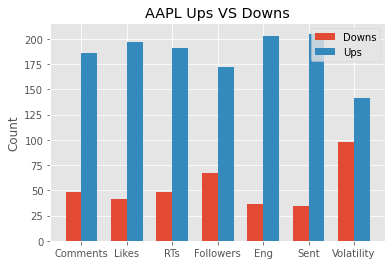

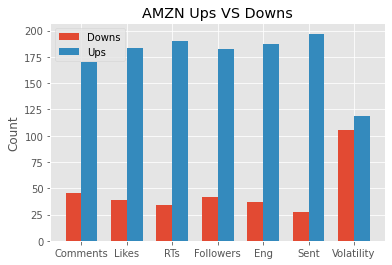

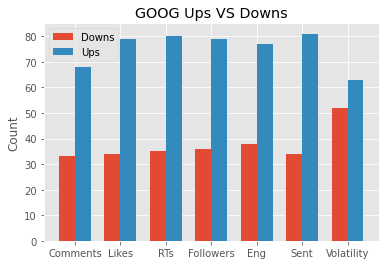

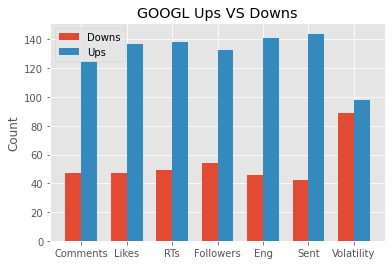

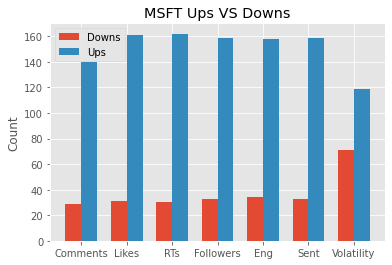

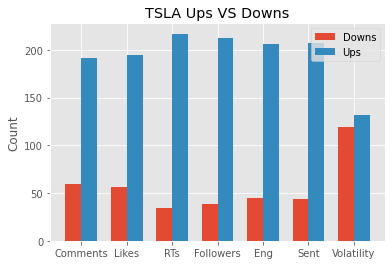

In [ ]:


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
N = 7

# sentiment_ups = []
# sentiment_downs = []
# for stock in sentiment_count['ups']:
#   sentiment_ups.append(sentiment_count['ups'][stock])
# for stock in sentiment_count['downs']:
#   sentiment_downs.append(sentiment_count['downs'][stock])


for stock in features:
  ups = []
  downs = []
  for feature in features[stock]:
    ups.append(features[stock][feature]['ups'])
    downs.append(features[stock][feature]['downs'])

  ind = np.arange(N) 
  width = 0.35      
  plt.bar(ind, downs, width, label='Downs')
  plt.bar(ind + width, ups, width,
      label='Ups')

  plt.ylabel('Count')
  plt.title(stock + ' Ups VS Downs')

  plt.xticks(ind + width / 2, ('Comments', 'Likes', 'RTs', 'Followers', 'Eng', 'Sent', 'Volatility'))
  plt.legend(loc='best')
  plt.show()

In [ ]:
#v1.1
# for feature in pre_split_df:
#   if feature != 'sentiment' and feature != 'Date' and feature !='ticker_symbol' and feature != 'target':
#     print(feature)
#     pre_split_df[feature] = pre_split_df[feature].astype(float)
#     x_min = pre_split_df[feature].min()
#     x_max = pre_split_df[feature].max()
#     for i in range(len(pre_split_df)):
#       print(pre_split_df['sentiment'][i])
#       pre_split_df[feature][i] = pre_split_df[feature][i] * abs(pre_split_df['sentiment'][i]) # mult by sentiment
#       pre_split_df[feature][i] = MinMax(pre_split_df[feature][i], x_min, x_max)
#     for i in range(len(pre_split_df)):
#       if pre_split_df['sentiment'][i] < 0:
#         pre_split_df[feature][i] *= -1

  

#v1.3
# for feature in pre_split_df:
#   if feature != 'sentiment' and feature != 'Date' and feature !='ticker_symbol' and feature != 'target':
#     print(feature)
#     pre_split_df[feature] = pre_split_df[feature].astype(float)
#     for i in range(len(pre_split_df)):
#       pre_split_df[feature][i] = pre_split_df[feature][i] * pre_split_df['sentiment'][i]
# for feature in pre_split_df:
#   if feature != 'sentiment' and feature != 'Date' and feature !='ticker_symbol' and feature != 'target':
#     x_min = pre_split_df[feature].min()
#     x_max = pre_split_df[feature].max()
#     for i in range(len(pre_split_df)):
#       pre_split_df[feature][i] = MinMax(pre_split_df[feature][i], x_min, x_max) 

# for feature in pre_split_df:
#   if feature != 'sentiment' and feature != 'Date' and feature !='ticker_symbol' and feature != 'target' and feature != 'price_difference':
#     print(feature)
#     pre_split_df[feature] = pre_split_df[feature].astype(float)
#     #1
#     for i in range(len(pre_split_df)):
#       pre_split_df[feature][i] = pre_split_df[feature][i] * pre_split_df['sentiment'][i] # mult by sentiment
#     #2
    #pre_split_df[feature] = robustScaleCol(pre_split_df[feature])

#Naive Method

2. By Total Score (naive)

In [ ]:
# group by
merged_df = merged_df.groupby(['ticker_symbol','Date']).mean().reset_index()
print(merged_df)
# Get X y
X = merged_df[['Total_Score']]
y = merged_df[['behaviour']]
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

    ticker_symbol        Date  ...  User_Score  Total_Score
0            AAPL  01/05/2019  ...    0.009932     0.011820
1            AAPL  01/08/2019  ...    0.012461    -0.044655
2            AAPL  01/10/2019  ...    0.013095     0.042482
3            AAPL  02/01/2019  ...    0.011379    -0.055978
4            AAPL  02/05/2019  ...    0.013095    -0.040264
..            ...         ...  ...         ...          ...
675          TSLA  30/12/2019  ...    0.011911    -0.012065
676          TSLA  31/01/2019  ...    0.038629    -0.032726
677          TSLA  31/03/2019  ...    0.017085    -0.014978
678          TSLA  31/07/2019  ...    0.014634    -0.036288
679          TSLA  31/10/2019  ...    0.015309    -0.017877

[680 rows x 27 columns]


# Toy Model


In [ ]:
path = '/Users/guyyaron/Desktop/ToyModel.xlsx'
toy_df = pd.read_csv(path)

toy_df['eng_score'] = [0 for x in range(len(toy_df))]
toy_df['Tweet_Score'] = [0.0 for i in range(len(toy_df))]
toy_df['Total_Score'] = [0.0 for i in range(len(toy_df))]

for i in range(len(toy_df)):
  toy_df['eng_score'][i] = getUserEngagementToy(toy_df[:][i])
  toy_df['Tweet_Score'][i] = getTweetScoreToy(toy_df[:][i])
  # scale tweets at the end
  toy_df['Total_Score'][i] = getTotalScoreToy(toy_df['eng_score'][i], toy_df['Tweet_Score'][i], toy_df['sentiment'][i])

# avg

# model prediction

#Linear Regression

In [ ]:
temp_df

,ticker_symbol,Date,tweet_id,post_date,comment_num,retweet_num,like_num,Negativity,Positivity,Neutral,Compound,Tweet_Score,Tweet_Score_Scaled,Open,Close,price_difference,behaviour,id,id_str,followers_count,favourites_count,listed_count,friends_count,statuses_count,verified,eng_total_retweets,eng_total_likes,eng_tweets_length,empty_tweets_apiCall,User_Score,Total_Score
0,AAPL,01/04/2019,1.112740e+18,1.554133e+09,3.750000,5.750000,38.250000,0.109000,0.042500,0.848500,-0.145750,13.375000,0.013600,47.772499,48.505001,0.407604,1.0,2.089961e+17,2.089961e+17,9.353900e+04,6782.500000,1504.000000,2147.750000,31793.000000,0.250000,1131.750000,6886.000000,1131.750000,1.0,0.000419,-1.636684
1,AAPL,01/05/2019,1.123569e+18,1.556715e+09,10.275862,14.655172,58.275862,0.081483,0.150138,0.768345,0.176503,24.465517,0.035540,52.459999,52.287498,0.092014,1.0,9.914758e+08,9.914758e+08,1.042531e+06,44587.413793,7460.655172,1431.413793,100448.344828,0.551724,2311.655172,16090.896552,2311.655172,1.0,0.000359,9.441653
2,AAPL,01/07/2019,1.145752e+18,1.562004e+09,4.666667,8.166667,27.833333,0.073000,0.118000,0.808833,0.163083,12.208333,0.011292,50.352501,50.682499,0.285931,1.0,1.865539e+17,1.865539e+17,1.491490e+05,37331.333333,1911.166667,4376.000000,60721.000000,0.500000,909.166667,12447.833333,909.166667,1.0,0.000214,2.415082
3,AAPL,01/08/2019,1.156874e+18,1.564655e+09,6.833333,18.333333,35.000000,0.086667,0.072333,0.841000,-0.041450,19.625000,0.025964,51.382500,51.005001,-0.139163,-1.0,1.525973e+09,1.525973e+09,5.443767e+04,35090.500000,1742.666667,2833.166667,53518.166667,0.500000,1174.000000,4311.500000,1174.000000,1.0,0.000850,1.254690
4,AAPL,01/10/2019,1.178967e+18,1.569923e+09,3.400000,13.200000,38.400000,0.090600,0.115400,0.794000,0.235640,17.050000,0.020870,55.764999,54.740002,-0.231939,-1.0,1.517959e+09,1.517959e+09,9.769408e+05,9229.600000,9218.200000,373.800000,138656.000000,0.600000,4194.000000,14076.400000,4194.000000,1.0,0.000542,3.062012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,TSLA,30/12/2019,1.211645e+18,1.577714e+09,8.363636,17.441558,74.636364,0.096584,0.102143,0.801234,0.006495,29.470779,0.045442,81.000000,83.666000,0.081177,1.0,5.677569e+17,5.677569e+17,6.315364e+04,73514.480519,460.571429,1724.207792,40299.545455,0.064935,771.402597,9163.558442,771.402597,1.0,0.001408,5.531645
1198,TSLA,31/01/2019,1.091084e+18,1.548970e+09,7.333333,10.555556,76.166667,0.121889,0.104556,0.773611,-0.116911,26.152778,0.038878,61.084000,62.442001,0.115825,1.0,4.067167e+17,4.067167e+17,3.063350e+04,67728.722222,469.666667,1579.444444,41634.222222,0.333333,379.666667,4892.833333,379.666667,1.0,0.001432,6.119954
1199,TSLA,31/03/2019,1.112326e+18,1.554034e+09,5.836364,10.272727,75.454545,0.067055,0.125818,0.807145,0.080053,25.459091,0.037506,56.523998,57.835999,0.207551,1.0,5.797484e+17,5.797484e+17,2.999225e+04,57954.836364,375.636364,1421.945455,42353.018182,0.054545,595.600000,7137.109091,595.600000,1.0,0.001484,6.902052
1200,TSLA,31/07/2019,1.156553e+18,1.564579e+09,5.483333,11.566667,81.750000,0.079550,0.107067,0.813383,0.116967,27.591667,0.041724,48.529999,46.770000,-0.171793,-1.0,4.381546e+17,4.381546e+17,4.425633e+04,90152.950000,410.733333,1660.600000,42082.233333,0.033333,727.100000,9031.066667,727.100000,1.0,0.001121,2.367649


,target
237,-0.774436
117,1.000000
209,0.965812
12,-0.773196
24,-0.882353
...,...
204,1.000000
53,-0.777778
38,0.660377
211,-0.962963


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()  # define our model using least square method
lm.fit(X_train,y_train)              # Fit our linear model

y_pred = lm.predict(X_test) # returns ndarray


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

#KNN

In [ ]:
# train the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
y_train

# predict
predictions = knn.predict(X_test)

# predictions
#pred = ['Down' if predictions[i]==-1 else 'Up' for i in range(len(predictions))]
pred = [x for x in predictions]
y_test_pred = pd.Series(pred, name='prediction', index=y_test.index)

#test_results_temp = pd.DataFrame(data={'Down':predictions[:,0], 'Up':predictions[:, 1], 'Predictions':y_test_pred})
test_results_temp = pd.DataFrame(data={'Down':predictions[0], 'Up':predictions[1], 'Predictions':y_test_pred})
actual = merged_df['behaviour']
actual.name = 'Actual'

test_results = pd.merge(left=test_results_temp, right=actual, left_index=True, right_index=True)
present_temp = test_results.drop(columns=['Down', 'Up'])
present = pd.concat([X_test, present_temp],axis=1)

present.reset_index(drop=True, inplace=True)
present



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,comments,retweets,likes,user_followers,user_engagement,Predictions,Actual
0,0.000170,0.000588,0.000555,0.000113,0.005040,1,-1
1,0.000000,0.086546,0.027216,0.000569,0.208493,1,1
2,0.007580,0.022520,0.018132,0.005191,0.013180,-1,-1
3,0.141162,0.146599,0.059532,0.000155,0.118682,1,1
4,0.007773,0.003945,0.023165,0.001020,-0.004399,1,-1
...,...,...,...,...,...,...,...
358,-0.003847,-0.013051,-0.055648,0.004944,-0.017643,1,-1
359,0.006231,0.007763,0.016288,0.000572,0.010423,1,-1
360,0.006428,0.012199,0.024967,0.000760,0.022201,1,-1
361,0.006125,0.000928,0.012580,0.000928,0.005749,1,-1


In [ ]:
#test results
from sklearn.metrics import classification_report, confusion_matrix

accuracy = getAccuracy(test_results)

print('Model Report:')
print('-----------------------------------------------------------')
print(classification_report(test_results['Actual'],test_results['Predictions'], target_names=['Down','Up']))
print('-----------------------------------------------------------')
print("Confusion matrix:")
print(confusion_matrix(test_results['Actual'],test_results['Predictions']))
print('-----------------------------------------------------------')
print('Model Accuracy:\n\t' + str(accuracy))
print('-----------------------------------------------------------')

Model Report:
-----------------------------------------------------------
              precision    recall  f1-score   support

        Down       0.47      0.33      0.39       183
          Up       0.48      0.62      0.54       180

    accuracy                           0.48       363
   macro avg       0.48      0.48      0.47       363
weighted avg       0.48      0.48      0.47       363

-----------------------------------------------------------
Confusion matrix:
[[ 61 122]
 [ 68 112]]
-----------------------------------------------------------
Model Accuracy:
	0.477
-----------------------------------------------------------


In [ ]:
#v1 - method 1
# looking at each stock by itself
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

def getAccuracy(test_results):
  len_correct_rows = test_results.loc[test_results.Predictions==test_results.Actual].any(axis=1).count()
  accuracy = round(len_correct_rows/len(test_results),3)

# group by
pre_split_df = pre_split_df.groupby(['ticker_symbol','Date']).mean().reset_index()

dfs = splitStocksDF(pre_split_df)

Xs = []
ys = []
Xs_train = []
Xs_test = []
ys_train = []
ys_test = []
predictions = []

for df in dfs:
  print(df)

for df in dfs:
  # Get X y
  X = pre_split_df.drop(columns=['ticker_symbol','Date','sentiment','target'])
  y = pre_split_df[['target']]
  Xs.append(X)
  ys.append(y) 
  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
  Xs_train.append(X_train)
  Xs_test.append(X_test)
  ys_train.append(y_train)
  ys_test.append(y_test)
#-----------------------

# train and predict the model
for i in range(len(Xs)):
  knn = KNeighborsClassifier(n_neighbors = 5)
  knn.fit(Xs_train[i], ys_train[i])
  predictions.append(knn.predict(Xs_test[i]))


#-----------------------

# predictions
#pred = ['Down' if predictions[i]==-1 else 'Up' for i in range(len(predictions))]
for i in range(len(predictions)):
  pred = [x for x in predictions[i]]
  y_test_pred = pd.Series(pred, name='prediction', index=ys_test[i].index)

  ups = []
  downs = []
  for j in range(len(predictions[i])):
    if predictions[i][j] == 1:
      ups.append(1)
      downs.append(0)
    else:
      ups.append(0)
      downs.append(1)


  # ups_series = pd.Series(ups, name='Up', index=ys_test[i].index)
  # downs_series = pd.Series(downs, name='Down', index=ys_test[i].index)
  

  #test_results_temp = pd.DataFrame(data={'Down':predictions[:,0], 'Up':predictions[:, 1], 'Predictions':y_test_pred})
  test_results_temp = pd.DataFrame(data={'Up':ups, 'Down':downs, 'Predictions':y_test_pred})
  actual = dfs[i]['target']
  actual.name = 'Actual'
  print('---------\nActual')
  print(actual)
  test_results = pd.merge(left=test_results_temp, right=actual, left_index=True, right_index=True)
  # print(test_results)

  len_correct_rows = test_results.loc[test_results.Predictions==test_results.Actual].any(axis=1).count()
  accuracy = round(len_correct_rows/len(test_results),3)
  print('---------------------------------------------------------------------------')
  print('Model Report:--' + dfs[i]['ticker_symbol'][0] + '--')
  print('-----------------------------------------------------------')
  print(classification_report(test_results['Actual'],test_results['Predictions'], labels=[1,-1]))
  print('-----------------------------------------------------------')
  print("Confusion matrix:")
  print(confusion_matrix(test_results['Actual'],test_results['Predictions']))
  print('-----------------------------------------------------------')
  #print('Model Accuracy:\n\t' + str(accuracy))
  present_temp = test_results.drop(columns=['Up', 'Down'])
  present = pd.concat([Xs_test[i], present_temp],axis=1)
  present.reset_index(drop=True, inplace=True)
  print(present)
  print('---------------------------------------------------------------------------')

In [ ]:
#v2 method 2
# looking at each stock by itself
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


# group by
merged_df = merged_df.groupby(['ticker_symbol','Date']).mean().reset_index()

dfs = splitStocksDF(merged_df)

Xs = []
ys = []
Xs_train = []
Xs_test = []
ys_train = []
ys_test = []
predictions = []

for df in dfs:
  # Get X y
  X = df[['Total_Score']]
  y = df[['behaviour']]
  Xs.append(X)
  ys.append(y)
  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
  Xs_train.append(X_train)
  Xs_test.append(X_test)
  ys_train.append(y_train)
  ys_test.append(y_test)
#-----------------------

# train and predict the model
for i in range(len(Xs)):
  knn = KNeighborsClassifier(n_neighbors = 5)
  knn.fit(Xs_train[i], ys_train[i])
  predictions.append(knn.predict(Xs_test[i]))


#-----------------------

# predictions
#pred = ['Down' if predictions[i]==-1 else 'Up' for i in range(len(predictions))]
for i in range(len(predictions)):
  pred = [x for x in predictions[i]]
  y_test_pred = pd.Series(pred, name='prediction', index=ys_test[i].index)

  ups = []
  downs = []
  up_count=0
  down_count=0
  for j in range(len(predictions[i])):
    if predictions[i][j] == 1:
      up_count+=1
      ups.append(1)
      downs.append(0)
    else:
      down_count+=1
      ups.append(0)
      downs.append(1)


  # ups_series = pd.Series(ups, name='Up', index=ys_test[i].index)
  # downs_series = pd.Series(downs, name='Down', index=ys_test[i].index)
  

  #test_results_temp = pd.DataFrame(data={'Down':predictions[:,0], 'Up':predictions[:, 1], 'Predictions':y_test_pred})
  test_results_temp = pd.DataFrame(data={'Up':ups, 'Down':downs, 'Predictions':y_test_pred})
  actual = dfs[i]['behaviour']
  actual.name = 'Actual'

  test_results = pd.merge(left=test_results_temp, right=actual, left_index=True, right_index=True)
  # print(test_results)
  present_temp = test_results.drop(columns=['Up', 'Down'])
  present = pd.concat([Xs_test[i], present_temp],axis=1)
  present.reset_index(drop=True, inplace=True)
  accuracy = getAccuracy(test_results)
  print('---------------------------------------------------------------------------')
  print('Model Report:--' + dfs[i]['ticker_symbol'][0] + '--')
  # print('-----------------------------------------------------------')
  # print(classification_report(test_results['Actual'],test_results['Predictions'], labels=[1,-1]))
  # print('1 = ' + str(up_count), '-1 = ' + str(down_count))
  # print('-----------------------------------------------------------')
  # print("Confusion matrix:")
  # print(confusion_matrix(test_results['Actual'],test_results['Predictions']))
  # print('---------------------------------------------------------------------------')


  print('Model Accuracy:\n\t' + str(accuracy))
  #print(present)


KeyError: ignored

In [ ]:
# find best K - TO IMPLEMENT
# import numpy as np
# error_rate = []
# min_range = 1
# max_range = 15
# for i in range(min_range,max_range):
#     knn = KNeighborsClassifier(n_neighbors = i)
#     knn.fit(X_train, y_train)
#     pred_i = knn.predict(X_test)
#     pred = ['Down' if pred_i[i][0]==1 else 'Up' for i in range(len(pred_i))]
#     error_rate.append(np.mean(pred != test_results['Actual']))

# trace = go.Scatter(
#     x=[i for i in range(min_range,max_range)],
#     y=error_rate,
#     mode='markers+lines', 
# )
# fig = go.Figure(trace)
# fig.update_layout(
#     title='Error by K Value', 
#     xaxis_title='k neighboors',
#     yaxis_title='Error rate'
# )
# fig.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
merged_df

In [ ]:
model = XGBClassifier()
model.fit(X,y)
feat_importances_df = pd.DataFrame({'feature_importance':model.feature_importances_},index=X.columns)
sorted_feat_importances_df = feat_importances_df.sort_values(by='feature_importance', ascending=False)

sorted_feat_importances_df

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,feature_importance
likes,0.236677
user_followers,0.221705
user_engagement,0.186447
retweets,0.180993
comments,0.174178


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [ ]:
probability = logmodel.predict_proba(X_test)
prediction = logmodel.predict(X_test)

In [ ]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# y_test_prob_0 =pd.Series(probability[:,0], name='probability_0',index = y_test.index)
# y_test_prob_1 =pd.Series(probability[:,1], name='probability_1',index = y_test.index)
# y_test_pred = pd.Series(prediction,name='prediction',index = y_test.index)

# test_xgb_results = pd.DataFrame(data={'probability_0':y_test_prob_0, 'probability_1':y_test_prob_1,'prediction':y_test_pred, 'actual':y_test})
# test_xgb_results

In [ ]:
c = 0
for i in range(len(prediction)):
  if prediction[i] < 0:
    c+=1
print(c)
print(len(predictions))

0
5521


#SVM

In [ ]:
# svm code here

# Data Exploration
- merged_df.describe()
- features correlations
- Up VS Down Distribution
- Sentiment Today VS Behaviour tommorow Distribution


In [ ]:
merged_df.describe()  

In [ ]:
temp_df = merged_df.copy()

temp_df = temp_df.groupby(by=['Date', 'ticker_symbol']).mean().reset_index()

dfs = splitStocksDF(temp_df)
dfs[4]

,Date,ticker_symbol,tweet_id,post_date,comment_num,retweet_num,like_num,Negativity,Positivity,Neutral,Compound,Open,Close,price_difference,behaviour,id,id_str,followers_count,favourites_count,listed_count,friends_count,statuses_count,verified,eng_total_retweets,eng_total_likes,eng_total_replies,eng_tweets_length
0,01/04/2019,MSFT,1.112741e+18,1.554133e+09,0.000000,13.000000,18.000000,0.109000,0.000000,0.891000,-0.711100,119.059998,119.190002,0.170006,1.0,1.044994e+08,1.044994e+08,12258.000000,43689.000000,215.000000,2720.000000,94710.000000,0.000000,459.00,978.000000,91.000000,100.0
1,01/05/2019,MSFT,1.123476e+18,1.556693e+09,6.000000,7.666667,34.000000,0.016000,0.120667,0.863333,0.391100,127.980003,126.209999,-1.669998,-1.0,2.885461e+17,2.885461e+17,5487.333333,18645.000000,110.666667,1005.333333,33464.666667,0.000000,223.00,859.666667,127.000000,100.0
2,01/10/2019,MSFT,1.179034e+18,1.569939e+09,1.000000,62.000000,112.000000,0.000000,0.084000,0.916000,0.493900,136.250000,134.649994,-2.420013,-1.0,3.681586e+08,3.681586e+08,23902.000000,27762.000000,701.000000,10790.000000,10063.000000,1.000000,1757.00,4215.000000,634.000000,100.0
3,02/01/2019,MSFT,1.080352e+18,1.546411e+09,33.000000,7.000000,77.000000,0.000000,0.150000,0.850000,0.712500,100.099998,97.400002,-3.720001,-1.0,2.806295e+09,2.806295e+09,43203.000000,13437.000000,1138.000000,25.000000,26193.000000,0.000000,505.00,5604.000000,625.000000,100.0
4,02/05/2019,MSFT,1.123913e+18,1.556797e+09,3.333333,8.666667,49.000000,0.064333,0.201000,0.734333,0.546167,127.360001,128.899994,2.689995,1.0,2.683674e+08,2.683674e+08,263311.000000,35316.000000,4749.666667,851.000000,20955.000000,0.333333,4575.00,51292.666667,3709.000000,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,30/09/2019,MSFT,1.178668e+18,1.569851e+09,1.333333,9.000000,39.333333,0.000000,0.100667,0.899333,0.416500,139.660004,137.070007,-1.959992,-1.0,7.372554e+17,7.372554e+17,7973.000000,29813.333333,225.666667,410.000000,8684.000000,0.000000,44.00,408.666667,37.333333,77.0
188,30/10/2019,MSFT,1.189609e+18,1.572460e+09,1.750000,26.750000,68.750000,0.030000,0.165750,0.804000,0.546325,144.899994,143.369995,-1.240006,-1.0,5.100074e+08,5.100074e+08,140980.250000,8873.000000,2914.250000,1245.750000,45705.250000,0.500000,2676.75,11000.000000,740.750000,100.0
189,30/12/2019,MSFT,1.211645e+18,1.577714e+09,2.750000,5.000000,25.750000,0.058000,0.041750,0.900000,-0.122900,156.770004,157.699997,0.110001,1.0,7.238861e+17,7.238861e+17,16747.000000,9763.250000,501.250000,510.250000,8315.500000,0.000000,220.75,1604.250000,125.500000,90.0
190,31/01/2019,MSFT,1.090991e+18,1.548947e+09,4.600000,20.500000,53.400000,0.039000,0.184400,0.776600,0.449010,103.779999,102.779999,-1.650002,-1.0,1.018354e+09,1.018354e+09,58641.800000,44341.100000,927.300000,1398.200000,36070.300000,0.300000,13303.10,93826.000000,1657.800000,93.1


In [ ]:
sentiment_count = {'ups': {'AAPL' : 0, 'AMZN': 0, 'GOOG': 0, 'GOOGL': 0, 'MSFT': 0, 'TSLA' :0 }, 'downs': {'AAPL' : 0, 'AMZN': 0, 'GOOG': 0, 'GOOGL': 0, 'MSFT': 0, 'TSLA' :0 }}
volatility_count = {'ups': {'AAPL' : 0, 'AMZN': 0, 'GOOG': 0, 'GOOGL': 0, 'MSFT': 0, 'TSLA' :0 }, 'downs': {'AAPL' : 0, 'AMZN': 0, 'GOOG': 0, 'GOOGL': 0, 'MSFT': 0, 'TSLA' :0 }}



# msft = 0
# aapl = 0
# goog = 0
# googl = 0
# amzn = 0

positives = []
negatives = []


for df in dfs:
  for i in range(len(df)):
    stock_name = df['ticker_symbol'][i]
    if df['Compound'][i] > 0:
      sentiment_count['ups'][stock_name] += 1
    elif df['Compound'][i] < 0: sentiment_count['downs'][stock_name] += 1
    if df['price_difference'][i] > 0:
      volatility_count['ups'][stock_name] += 1
    elif df['price_difference'][i] < 0: volatility_count['downs'][stock_name] += 1

print(sentiment_count, volatility_count)

{'ups': {'AAPL': 205, 'AMZN': 197, 'GOOG': 81, 'GOOGL': 144, 'MSFT': 159, 'TSLA': 207}, 'downs': {'AAPL': 34, 'AMZN': 27, 'GOOG': 34, 'GOOGL': 42, 'MSFT': 33, 'TSLA': 44}} {'ups': {'AAPL': 141, 'AMZN': 119, 'GOOG': 63, 'GOOGL': 98, 'MSFT': 119, 'TSLA': 132}, 'downs': {'AAPL': 98, 'AMZN': 105, 'GOOG': 52, 'GOOGL': 89, 'MSFT': 71, 'TSLA': 119}}


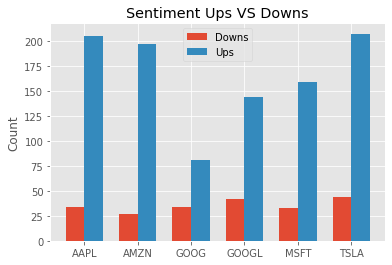

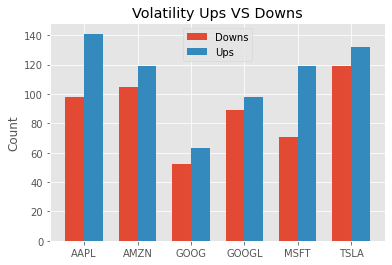

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
N = 6
sentiment_ups = []
sentiment_downs = []
for stock in sentiment_count['ups']:
  sentiment_ups.append(sentiment_count['ups'][stock])
for stock in sentiment_count['downs']:
  sentiment_downs.append(sentiment_count['downs'][stock])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, sentiment_downs, width, label='Downs')
plt.bar(ind + width, sentiment_ups, width,
    label='Ups')

plt.ylabel('Count')
plt.title('Sentiment Ups VS Downs')

plt.xticks(ind + width / 2, ('AAPL', 'AMZN', 'GOOG', 'GOOGL', 'MSFT', 'TSLA'))
plt.legend(loc='best')
plt.show()



volatility_ups = []
volatility_downs = []
for stock in volatility_count['ups']:
  volatility_ups.append(volatility_count['ups'][stock])
for stock in volatility_count['downs']:
  volatility_downs.append(volatility_count['downs'][stock])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, volatility_downs, width, label='Downs')
plt.bar(ind + width, volatility_ups, width,
    label='Ups')

plt.ylabel('Count')
plt.title('Volatility Ups VS Downs')

plt.xticks(ind + width / 2, ('AAPL', 'AMZN', 'GOOG', 'GOOGL', 'MSFT', 'TSLA'))
plt.legend(loc='best')
plt.show()

In [ ]:
ups_final = []
downs_final = []

com_ups = 0
com_downs = 0
likes_ups = 0
likes_downs = 0
rts_ups = 0
rts_downs = 0
eng_ups =0
eng_downs = 0
follower_ups = 0
follower_downs = 0
for stock in features:
  print(features[stock])
  com_ups += features[stock]['comments']['ups']
  com_downs += features[stock]['comments']['downs']
  likes_ups += features[stock]['likes']['ups']
  likes_downs += features[stock]['likes']['downs']
  rts_ups += features[stock]['retweets']['ups']
  rts_downs += features[stock]['retweets']['downs']
  eng_ups += features[stock]['user_engagement']['ups']
  eng_downs += features[stock]['user_engagement']['downs']
  follower_ups += features[stock]['user_followers']['ups']
  follower_downs += features[stock]['user_followers']['downs']

vol_downs = 0
vol_ups = 0
for vol in volatility_downs:
  vol_downs+=vol  
for vol in volatility_ups:
  vol_ups+=vol  

sen_downs = 0
sen_ups = 0
for vol in sentiment_downs:
  sen_downs+=vol  
for vol in sentiment_ups:
  sen_ups+=vol  


ups_final = [com_ups/6, likes_ups/6, rts_ups/6, eng_ups/6, follower_ups/6, sen_ups/6, vol_ups/6]
downs_final = [com_downs/6, likes_downs/6, rts_downs/6, eng_downs/6, follower_downs/6, sen_downs/6, vol_downs/6]

{'comments': {'ups': 186, 'downs': 48}, 'retweets': {'ups': 197, 'downs': 41}, 'likes': {'ups': 191, 'downs': 48}, 'user_followers': {'ups': 172, 'downs': 67}, 'user_engagement': {'ups': 203, 'downs': 36}, 'sentiment': {'ups': 205, 'downs': 34}, 'price_difference': {'ups': 141, 'downs': 98}}
{'comments': {'ups': 170, 'downs': 45}, 'retweets': {'ups': 183, 'downs': 39}, 'likes': {'ups': 190, 'downs': 34}, 'user_followers': {'ups': 182, 'downs': 42}, 'user_engagement': {'ups': 187, 'downs': 37}, 'sentiment': {'ups': 197, 'downs': 27}, 'price_difference': {'ups': 119, 'downs': 105}}
{'comments': {'ups': 68, 'downs': 33}, 'retweets': {'ups': 79, 'downs': 34}, 'likes': {'ups': 80, 'downs': 35}, 'user_followers': {'ups': 79, 'downs': 36}, 'user_engagement': {'ups': 77, 'downs': 38}, 'sentiment': {'ups': 81, 'downs': 34}, 'price_difference': {'ups': 63, 'downs': 52}}
{'comments': {'ups': 124, 'downs': 47}, 'retweets': {'ups': 137, 'downs': 47}, 'likes': {'ups': 138, 'downs': 49}, 'user_follow

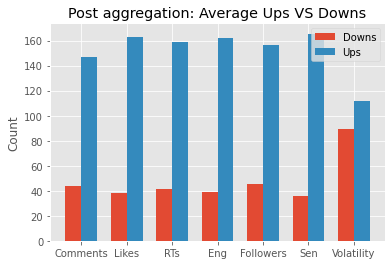

In [ ]:
total = vol_ups+vol_downs
down_per = str(round(vol_downs / total,3)) +'%'
up_per = str(round(vol_ups / total, 3)) + '%'

ind = np.arange(7) 
width = 0.35       
plt.bar(ind, downs_final, width, label='Downs')
plt.bar(ind + width, ups_final, width,
    label='Ups')

plt.ylabel('Count')
plt.title('Post aggregation: Average Ups VS Downs')

plt.xticks(ind + width / 2, ('Comments', 'Likes', 'RTs', 'Eng', 'Followers', 'Sen', 'Volatility'))
plt.legend(loc='best')
plt.show()

In [ ]:
features

{'AAPL': {'comments': {'downs': 435, 'ups': 1086},
  'likes': {'downs': 466, 'ups': 1055},
  'price_difference': {'downs': 576, 'ups': 945},
  'retweets': {'downs': 446, 'ups': 1075},
  'sentiment': {'downs': 466, 'ups': 1055},
  'user_engagement': {'downs': 466, 'ups': 1055},
  'user_followers': {'downs': 466, 'ups': 1055}},
 'AMZN': {'comments': {'downs': 247, 'ups': 861},
  'likes': {'downs': 266, 'ups': 842},
  'price_difference': {'downs': 560, 'ups': 548},
  'retweets': {'downs': 256, 'ups': 852},
  'sentiment': {'downs': 266, 'ups': 842},
  'user_engagement': {'downs': 265, 'ups': 843},
  'user_followers': {'downs': 266, 'ups': 842}},
 'GOOG': {'comments': {'downs': 55, 'ups': 148},
  'likes': {'downs': 60, 'ups': 143},
  'price_difference': {'downs': 101, 'ups': 102},
  'retweets': {'downs': 59, 'ups': 144},
  'sentiment': {'downs': 61, 'ups': 142},
  'user_engagement': {'downs': 61, 'ups': 142},
  'user_followers': {'downs': 60, 'ups': 143}},
 'GOOGL': {'comments': {'downs': 1

In [ ]:
df = merged_df[['eng_score','Date']]

df['robust_scaling'] = robustScaleCol(df['eng_score'])
df['min_max_scaling'] = minMaxCol(df['eng_score'])
df['standard_scaling'] = standardScaleCol(df['eng_score'])

df_name = 'All Stocks'
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['eng_score'],
                    mode='lines',
                    name='No Scaling'))
fig.add_trace(go.Scatter(x=df.index, y=df['robust_scaling'],
                    mode='lines',
                    name='Robust Scaling'))
fig.add_trace(go.Scatter(x=df.index, y=df['min_max_scaling'],
                    mode='lines',
                    name='min max scaling'))
fig.add_trace(go.Scatter(x=df.index, y=df['standard_scaling'],
                    mode='lines',
                    name='standard scaling'))
fig.update_layout(title=df_name + '\nTesting eng score distribution different scaling',
                  xaxis_title='Date',
                  yaxis_title='Value')
fig.show()

In [ ]:
import matplotlib.pyplot as plt
temp_df = merged_df.groupby(by=['ticker_symbol', 'Date']).mean().reset_index()

dfs = splitStocksDF(temp_df)

for df in dfs:
  df.plot(x='Total_Score', y='price_difference', style='o')  
  plt.title(df['ticker_symbol'][0] + ' -- Total Score VS Price Difference')  
  plt.xlabel('Total Score')  
  plt.ylabel('price difference')
  plt.show()

Correlation between feaures


In [ ]:
features = merged_df[['comment_num', 'retweet_num','like_num','Compound']]
features
features.corr()

In [ ]:
temp_df = merged_df[merged_df['verified'] == True]
temp_df['writer'].nunique()

Up VS Down Distribution

In [ ]:
def getPercentage(x, total):
  return round(x/total.sum()*100,2)

def getPercentageList(df_list): 
  percentage_list = [str(getPercentage(x, df_list)) +'%' for x in df_list]
  return percentage_list

target = merged_df.behaviour.value_counts()
percentage = getPercentageList(target)
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Up', 'Down'],
    y=target,
    marker_color=['green','red'],
    text=percentage,
    textposition='outside',
))
fig.update_layout(
    title='Up vs Down Count', 
    yaxis_title='Count',
    )
fig.show()
type(target)

In [ ]:
def getPercentage(x, total):
  return round(x/total.sum()*100,2)

def getPercentageList(df_list): 
  percentage_list = [str(getPercentage(x, df_list)) +'%' for x in df_list]
  return percentage_list

dfs = splitStocksDF(merged_df)

for df in dfs:
  #df_name = df['ticker_symbol'].iloc[0]
  target = df.behaviour.value_counts()
  percentage = getPercentageList(target)
  print(percentage)
  fig = go.Figure()
  fig.add_trace(go.Bar(
      x=['Up', 'Down'],
      y=target,
      marker_color=['green','red'],
      text=percentage,
      textposition='outside',
  ))
  fig.update_layout(
      title=df_name + ' Up vs Down', 
      yaxis_title='Count',
      )
  fig.show()
percentage

Correlation
Sentiment score (current day) VS stocks price behaviour (next day)


In [ ]:
# define correlation dfs
temp_df = merged_df[["Date","ticker_symbol","price_difference","Compound","Open","Close"]]

#groupby - mean
grouped_temp_df = temp_df.groupby(['Date', 'ticker_symbol']).mean().add_suffix('_MEAN').reset_index()

# get categorials
grouped_temp_df['Categorial_sentiment'] = [1 if x >= 0 else -1 for x in grouped_temp_df['Compound_MEAN']]
grouped_temp_df['Categorial_behaviour'] = [1 if x >= 0 else -1 for x in grouped_temp_df['price_difference_MEAN']]
#temp_df['Categorial_behaviour'] = [1 if x == 'Up' else -1 for x in temp_df['behaviour']]

dfs = splitStocksDF(grouped_temp_df)

  
# scale price difference
for df in dfs:
  df['price_difference_MEAN_absValue'] = [abs(x) for x in df['price_difference_MEAN']]
  df['Scaled_price_difference_MEAN'] = minMaxCol(df['price_difference_MEAN_absValue'])
  for i in range(len(df)):
    if df['price_difference_MEAN'][i] < 0:
     df['Scaled_price_difference_MEAN'][i] = df['Scaled_price_difference_MEAN'][i] * (-1)
  # df['Scaled_price_difference_MEAN'] = [x * (-1) if  for x in df['price_difference_MEAN']]

dfs[3]
# temp_df[temp_df['Date'] == '01/02/2019']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,ticker_symbol,price_difference_MEAN,Compound_MEAN,Open_MEAN,Close_MEAN,Categorial_sentiment,Categorial_behaviour,price_difference_MEAN_absValue,Scaled_price_difference_MEAN
0,01/05/2019,GOOGL,-6.809936,0.108167,1179.380005,1166.510010,1,-1,6.809936,-0.061974
1,01/07/2019,GOOGL,12.599976,0.173800,1112.890015,1112.599976,1,1,12.599976,0.114977
2,01/08/2019,GOOGL,-15.460083,0.784500,1209.500000,1196.319946,1,-1,15.460083,-0.141158
3,01/10/2019,GOOGL,-28.079956,0.658600,1198.760010,1177.920044,1,-1,28.079956,-0.256683
4,02/01/2019,GOOGL,-29.210083,0.312567,1066.260010,1025.469971,1,-1,29.210083,-0.267028
...,...,...,...,...,...,...,...,...,...,...
182,30/12/2019,GOOGL,-0.319946,-0.437150,1340.660034,1339.390015,-1,-1,0.319946,-0.002563
183,31/01/2019,GOOGL,-7.270020,0.835300,1134.400024,1118.619995,1,-1,7.270020,-0.066185
184,31/03/2019,GOOGL,22.089965,0.153100,1200.199951,1198.979980,1,1,22.089965,0.201849
185,31/07/2019,GOOGL,-6.419922,0.860150,1236.300049,1211.780029,1,-1,6.419922,-0.058404


In [ ]:
#Up and Down Distribution
def getAcc(df):
  correct_rows = df[df['Categorial_behaviour'] == df['Categorial_sentiment']]
  accuracy = round(len(correct_rows)/len(df),3) 
  return accuracy
temp_df = merged_df[["Date","ticker_symbol","price_difference","Compound","Open","Close"]]

#groupby - mean
grouped_temp_df = temp_df.groupby(['Date', 'ticker_symbol']).mean().reset_index()
#grouped_temp_df = temp_df.groupby(['Date']).mean().reset_index()

# new start

dfs = splitStocksDF(grouped_temp_df)
#scale
for df in dfs:
  df['price_difference_absValue'] = [abs(x) for x in df['price_difference']]
  df['Scaled_price_difference'] = minMaxCol(df['price_difference_absValue'])
  for i in range(len(df)):
    if df['price_difference'][i] < 0:
      df['Scaled_price_difference'][i] = df['Scaled_price_difference'][i] * (-1)

temp_df = pd.concat(dfs)

# new end


#old start

#scale
# temp_df['price_difference_absValue'] = [abs(x) for x in temp_df['price_difference']]
# temp_df['Scaled_price_difference'] = minMaxCol(temp_df['price_difference_absValue'])
# for i in range(len(temp_df)):
#   if temp_df['price_difference'][i] < 0:
#     temp_df['Scaled_price_difference'][i] = temp_df['Scaled_price_difference'][i] * (-1)

# old end




# get categorials
grouped_temp_df['Categorial_sentiment'] = [1 if x >= 0 else -1 for x in grouped_temp_df['Compound']]
grouped_temp_df['Categorial_behaviour'] = [1 if x >= 0 else -1 for x in grouped_temp_df['price_difference']]

df = grouped_temp_df

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Compound'],
                    mode='lines',
                    name='Sentiment_Per_Day'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Scaled_price_difference'],
                    mode='lines',
                    name='Actual_volatility_Day_After'))
fig.update_layout(title= 'as Accuracy ' + str(getAcc(df)),
                  xaxis_title='Date',
                  yaxis_title='Value')
fig.show()

In [ ]:
#TEMPPPP

#Present the graph
import plotly.graph_objects as go

#Up and Down Distribution
def getAcc(df):
  correct_rows = df[df['Categorial_behaviour'] == df['Categorial_sentiment']]
  accuracy = round(len(correct_rows)/len(df),3) 
  return accuracy

temp_df = merged_df[["Date","ticker_symbol","price_difference","Compound","Open","Close"]]

temp_df['Close'] = minMaxCol(temp_df['Close'])

grouped_temp_df = temp_df.groupby(['Date', 'ticker_symbol']).mean().reset_index()

# get categorials
grouped_temp_df['Categorial_sentiment'] = [1 if x >= 0 else -1 for x in grouped_temp_df['Compound']]
grouped_temp_df['Categorial_behaviour'] = [1 if x >= 0 else -1 for x in grouped_temp_df['price_difference']]

dfs = splitStocksDF(grouped_temp_df)
## scale
# for df in dfs:
#   df['price_difference_absValue'] = [abs(x) for x in df['price_difference']]
#   df['Scaled_price_difference'] = minMaxCol(df['price_difference_absValue'])
#   for i in range(len(df)):
#     if df['price_difference'][i] < 0:
#       df['Scaled_price_difference'][i] = df['Scaled_price_difference'][i] * (-1)

# plotly go
for df in dfs:
  if len(df) == 0: break
  df_name = df['ticker_symbol'].iloc[0]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=df['Date'], y=df['Compound'],
                      mode='lines',
                      name='Sentiment_Per_Day'))
  fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'],
                      mode='lines',
                      name='Close day after'))
  fig.update_layout(title= df_name +' \n Accuracy ' + str(getAcc(df)),
                    xaxis_title='Date',
                    yaxis_title='Value')
  fig.show()

#test percetages
def getPercentage(x, total):
  return round(x/total.sum()*100,2)

def getPercentageList(df_list): 
  percentage_list = [str(getPercentage(x, df_list)) +'%' for x in df_list]
  return percentage_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Sentiment per day VS (Close today - Close nextday)

In [ ]:
#Present the graph
import plotly.graph_objects as go

#Up and Down Distribution
def getAcc(df):
  correct_rows = df[df['Categorial_behaviour'] == df['Categorial_sentiment']]
  accuracy = round(len(correct_rows)/len(df),3) 
  return accuracy

temp_df = merged_df[["Date","ticker_symbol","price_difference","Compound","Open","Close"]]

grouped_temp_df = temp_df.groupby(['Date', 'ticker_symbol']).mean().reset_index()

# get categorials
grouped_temp_df['Categorial_sentiment'] = [1 if x >= 0 else -1 for x in grouped_temp_df['Compound']]
grouped_temp_df['Categorial_behaviour'] = [1 if x >= 0 else -1 for x in grouped_temp_df['price_difference']]

dfs = splitStocksDF(grouped_temp_df)
#scale
for df in dfs:
  df['price_difference_absValue'] = [abs(x) for x in df['price_difference']]
  df['Scaled_price_difference'] = minMaxCol(df['price_difference_absValue'])
  for i in range(len(df)):
    if df['price_difference'][i] < 0:
      df['Scaled_price_difference'][i] = df['Scaled_price_difference'][i] * (-1)

# plotly go
for df in dfs:
  if len(df) == 0: break
  df_name = df['ticker_symbol'].iloc[0]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=df['Date'], y=df['Compound'],
                      mode='lines',
                      name='Sentiment_Per_Day'))
  fig.add_trace(go.Scatter(x=df['Date'], y=df['Scaled_price_difference'],
                      mode='lines',
                      name='Actual_volatility_Day_After'))
  fig.update_layout(title= df_name +' \n Accuracy ' + str(getAcc(df)),
                    xaxis_title='Date',
                    yaxis_title='Value')
  fig.show()

#test percetages
def getPercentage(x, total):
  return round(x/total.sum()*100,2)

def getPercentageList(df_list): 
  percentage_list = [str(getPercentage(x, df_list)) +'%' for x in df_list]
  return percentage_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# TEST SCALING DISTRIBUTION (old VS new)
for df in dfs:
  df_name = df['ticker_symbol'].iloc[0]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=df['Date'], y=df['price_difference_MEAN'],
                      mode='lines',
                      name='none_scaled_price_diff_cols'))
  fig.add_trace(go.Scatter(x=df['Date'], y=df['Scaled_price_difference_MEAN'],
                      mode='lines',
                      name='scaled_price_diff_cols'))
  fig.update_layout(title=df_name + '\nTesting the distribution after scaling',
                    xaxis_title='Date',
                    yaxis_title='Value')
  fig.show()

In [ ]:
for df in dfs:
  corrects = 0
  for i in range(len(df)):
    if df['price_difference_MEAN'][i] == 0 and df['Scaled_price_difference_MEAN'][i] == 0:
      corrects+=1
    elif df['price_difference_MEAN'][i] > 0 and df['Scaled_price_difference_MEAN'][i] > 0:
      corrects+=1
    elif df['price_difference_MEAN'][i] < 0 and df['Scaled_price_difference_MEAN'][i] < 0:
      corrects+=1
  print(corrects/len(df))

verified percentages

In [ ]:
verified_dfs = [merged_df[merged_df['ticker_symbol'] == 'AAPL'],
                merged_df[merged_df['ticker_symbol'] == 'AMZN'],
                merged_df[merged_df['ticker_symbol'] == 'GOOG'],
                merged_df[merged_df['ticker_symbol'] == 'GOOGL'],
                merged_df[merged_df['ticker_symbol'] == 'MSFT'],
                merged_df[merged_df['ticker_symbol'] == 'TSLA']]

for df in verified_dfs:
  total = df['writer'].nunique()
  verified = df[df['verified']==True]
  num_verified = verified['writer'].nunique()
  percent = num_verified/total
  ticker_name = df['ticker_symbol'].iloc[0]
  print(ticker_name + '= ' + str(round(percent*100,3)) + '% verified --> num= ' + str(num_verified)+'/'+str(total))


In [ ]:
# Open VS Close repersentation
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfs[3]['Date'], y=dfs[3]['Open_MEAN'],
                    mode='lines',
                    name='Open'))
fig.add_trace(go.Scatter(x=dfs[3]['Date'], y=dfs[3]['Close_MEAN'],
                    mode='lines',
                    name='Close'))

fig.update_layout(title='GOOGL prices Open VS Closed',
                  xaxis_title='Date',
                  yaxis_title='Value')
fig.show()

Open_MEAN_Scaled VS Closed_MEAN_Scaled VS Sentiment

In [ ]:
tmp_dfs = dfs


# scale the data
for df in tmp_dfs:
  df['Open_MEAN_Scaled'] = [minMaxNegOneToOne(x, df['Open_MEAN']) for x in df['Open_MEAN']]
  df['Close_MEAN_Scaled'] = [minMaxNegOneToOne(x, df['Close_MEAN']) for x in df['Close_MEAN']]


for df in tmp_dfs:
  df_name = df['ticker_symbol'].iloc[0]
  fig = go.Figure()
  # fig.add_trace(go.Scatter(x=df['Date'], y=df['Open_MEAN_Scaled'],
  #                     mode='lines',
  #                     name='Next Day Open'))
  fig.add_trace(go.Scatter(x=df['Date'], y=df['Close_MEAN_Scaled'],
                      mode='lines',
                      name='Next Day Close'))
  fig.add_trace(go.Scatter(x=df['Date'], y=df['Compound_MEAN'],
                      mode='lines',
                      name='Sentiment MEAN per day'))
  fig.update_layout(title= df_name +' Next Day Open/Close vs Sentiment',
                    xaxis_title='Date',
                    yaxis_title='Value')
  fig.show()

Feature Importance

In [ ]:
#feature importance - Statistical Test using XGBClassifier
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X,y)
feat_importances_df = pd.DataFrame({'feature_importance':model.feature_importances_},index=X.columns)
sorted_feat_importances_df = feat_importances_df.sort_values(by='feature_importance', ascending=False)

sorted_feat_importances_df

In [ ]:
merged_df.head()

# Yahoo Finance API

Get Data From Yahoo Finance

In [ ]:
# imports

import requests # Yahoo Finance
import yfinance as yfAPI # Yahoo Finance

help(yfAPI.download)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, group_by='column', auto_adjust=False, back_adjust=False, progress=True, period='max', show_errors=True, interval='1d', prepost=False, proxy=None, rounding=False, timeout=None, **kwargs)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        group_by : str
            Group by 'ticker' o

In [ ]:
# get data
tickers = ['TSLA']
stocks_data = yfAPI.download(tickers=tickers, period='2d', interval='1d')

stocks_data

In [ ]:
tickers = ['AAPL','AMZN','GOOG','GOOGL','MSFT', 'TSLA']
start_date = '2019-01-01'
end_date = '2019-12-31'

stocks_data = yfAPI.download(tickers=tickers, start=start_date, end=end_date, interval='1h')
stocks_data

[*********************100%***********************]  6 of 6 completed

6 Failed downloads:
- GOOGL: 1h data not available for startTime=1546300800 and endTime=1577750400. The requested range must be within the last 730 days.
- TSLA: 1h data not available for startTime=1546300800 and endTime=1577750400. The requested range must be within the last 730 days.
- MSFT: 1h data not available for startTime=1546300800 and endTime=1577750400. The requested range must be within the last 730 days.
- AMZN: 1h data not available for startTime=1546300800 and endTime=1577750400. The requested range must be within the last 730 days.
- AAPL: 1h data not available for startTime=1546300800 and endTime=1577750400. The requested range must be within the last 730 days.
- GOOG: 1h data not available for startTime=1546300800 and endTime=1577750400. The requested range must be within the last 730 days.


Empty DataFrame
Columns: [(Adj Close, AAPL), (Adj Close, AMZN), (Adj Close, GOOG), (Adj Close, GOOGL), (Adj Close, MSFT), (Adj Close, TSLA), (Close, AAPL), (Close, AMZN), (Close, GOOG), (Close, GOOGL), (Close, MSFT), (Close, TSLA), (High, AAPL), (High, AMZN), (High, GOOG), (High, GOOGL), (High, MSFT), (High, TSLA), (Low, AAPL), (Low, AMZN), (Low, GOOG), (Low, GOOGL), (Low, MSFT), (Low, TSLA), (Open, AAPL), (Open, AMZN), (Open, GOOG), (Open, GOOGL), (Open, MSFT), (Open, TSLA), (Volume, AAPL), (Volume, AMZN), (Volume, GOOG), (Volume, GOOGL), (Volume, MSFT), (Volume, TSLA)]
Index: []

Display data via Graph

In [ ]:
fig = go.Figure()

# add data
fig.add_trace(go.Candlestick(
    x=stocks_data.index,
    open=stocks_data['Open'],
    high=stocks_data['High'],
    low=stocks_data['Low'],
    close=stocks_data['Close'],
    name='market_data_test'
    ))

title_str=""

for ticker in tickers:
  title_str += ticker + " "


#add titles
fig.update_layout(
    title=title_str + 'live share prices',
    yaxis_title='Stock Price (USD per Shares)'
)

# X-Axes preps
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label='15m', step='minute', stepmode='backward'),
            dict(count=45, label='45m', step='minute', stepmode='backward'),
            dict(count=1, label='HTD', step='hour', stepmode='todate'),
            dict(count=5, label='5h', step='hour', stepmode='backward'),
            dict(step='all')  
        ])
    )
)

fig.show()

# Twitter API

In [ ]:
# v1.1

# Connect with Twitter API
twitterAPI = connectToTwitterAPI1()
help(twitterAPI)


NameError: ignored

In [ ]:
#v2
twitterAPI_v2 = connectToTwitterAPI2()

In [ ]:
help(twitterAPI_v2.request)
help(datetime.datetime)

In [ ]:
id = '1083461136719269891'
date_since = datetime.datetime(2019, 1, 1, 0, 0, 0, 0,).isoformat('T') +'Z'
date_until =   datetime.datetime(2019, 12, 31, 0, 0, 0, 0).isoformat('T') + 'Z'

prms = {
    'max_results':5,
    'start_time': date_since,
    'end_time': date_until,
}
tweets = twitterAPI_v2.request(resource='users/:'+id+'/tweets', params = prms)
for tweet in tweets:
  print(tweet)

{'id': '1210567275968974848', 'text': 'RT @alistairmilne: thERe iS nO dEMaNd FoR BiTcOIn:\n\nJan 1st 2019:  $1.85billion USDt\nDec 27th 2019:  $4.7billion USDt'}
{'id': '1210346662444642305', 'text': "RT @JamesTodaroMD: Some of the best performing investments of the decade. Happy New Year's everyone.\n\n*Bitcoin enters once publicly traded…"}
{'id': '1210345948813123585', 'text': 'RT @alistairmilne: Yet another attempt to explain halving effects:\n\nAfter May 2020, there will probably be ~$2.3billion/year seeking to buy…'}
{'id': '1210254764480569345', 'text': '$TSLA EV sales in US since January 2018: 327,352\n\nAll other EV sales in US since January 2018: 278,214\n\nI think we have a winner.'}
{'id': '1209512826785714176', 'text': 'A year ago today we were in the biggest market #panic in years and people were saying &gt;50% chance of #recession in 2019. Now, 37% later, the S&amp;P is at new highs! It pays to tune out overexcitement, both negative and positive.'}


Get Users Reach

In [ ]:
followers = twitterAPI.followers(user_id='146008010', count='10', skip_status=True)

In [ ]:
i = 8
print(followers[i].followers_count)
print(followers[i].screen_name)
print(followers[i].friends_count)
followers[i]

0
JoyceDumas2222
32


User(_api=<tweepy.api.API object at 0x7f7717d3c550>, _json={'id': 1478056956703215624, 'id_str': '1478056956703215624', 'name': 'Joyce Dumas', 'screen_name': 'JoyceDumas2222', 'location': '', 'description': 'Kind and lovely', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 32, 'listed_count': 0, 'created_at': 'Mon Jan 03 17:34:00 +0000 2022', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1478057320672374794/Ip2jUh1K_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1478057320672374794/Ip2jUh1K_normal.jpg', '

In [ ]:
test = pd.DataFrame()
test['test1'] = 1
test['test1'] = 2
test

Get Users Engagement

In [ ]:


#user = twitterAPI.search_users(['Elon Musk'], count=1)
#user = twitterAPI.get_user('44196397')
# elon musk tweets
#user_tweets = twitterAPI.user_timeline(user_id='1083461136719269891',exclude_replies=True)

# date_since = datetime(2019, 1, 1, 0, 0, 0)
# date_until =   datetime(2020, 1, 1, 0, 0, 0)

# tweets = tweepy.Cursor(twitterAPI.user_timeline,
#                             user_id='1083461136719269891',
#                             lang="en",
#                             since='2019-01-01',
#                             until='2020-01-01',
#                             result_type="mixed"
#                             ).items(2)

In [ ]:
userID = '1083461136719269891';

# startDate = datetime(2021, 12, 1, 0, 0, 0)
# endDate =   datetime(2022, 1, 1, 0, 0, 0)

tweets = []
tmpTweets = twitterAPI.user_timeline('146008010', count=1)
tmpTweets[0]._json
# for tweet in tmpTweets:
#     if tweet.created_at < endDate and tweet.created_at > startDate:
#         tweets.append(tweet)
# tweets
# while (tmpTweets[-1].created_at > startDate):
#     tmpTweets = twitterAPI.user_timeline(userID, max_id = tmpTweets[-1].id)
#     for tweet in tmpTweets:
#         if tweet.created_at < endDate and tweet.created_at > startDate:
#             tweets.append(tweet)

In [ ]:
txt = tmpTweets[10].text
print(txt[0]+txt[1]+txt[2]+txt[3] == 'RT @')
txt

True


'RT @ZackFradellaWx: The local radar is moving in late 2022. Great move by @NWSNewOrleans     This will help those living in Baton Rouge/Mor…'

In [ ]:
userID1 = '1083461136719269891';
userID_alot = '175576617';
#tmpTweets = twitterAPI.user_timeline('175576617', count=100)
total_RT = 0
followers = tmpTweets[2]._json['user']['followers_count']
for i in range(len(tmpTweets)):
  txt = tmpTweets[i].text
  if (txt[0]+txt[1]+txt[2]+txt[3] == 'RT @'):
    total_RT+= tmpTweets[i].retweet_count
    #print(tmpTweets[i].retweet_count, i)
total_RT
    #break
# for tweet in tmpTweets:
#   total_ing += tweet.retweet_count + tweet.favorite_count
# (total_ing/followers) / 100


1781

In [ ]:
users_df['ing_score'] = ['temp' for x in range(len(users_df))]

In [ ]:
# v1
tweets_num = 100

for i in range(len(users_df)):
  try:
    tmpTweets = twitterAPI.user_timeline(users_df['id_str'][i], count=tweets_num)

    for tweet in tmpTweets:
      if tweet.type != 
      total_ing += tweet.retweet_count + tweet.favorite_count

    users_df['ing_score'][i] = (total_ing/users_df['followers_count'][i])/len(tmpTweets)

  except tweepy.TweepError as err:
    if "429" in str(err.response):
      print(err)
      print("Sleeping...")
      time.sleep(15*60) # sleep 15 mins
    else:
      print("Failed to run the command on that user, Skipping... on row=" + str(i))
      print(err)
  except OverflowError as err:
    print("Failed to run the ingagement on that user, Skipping... on row=" + str(i))
    print(err)


In [ ]:
help(twitterAPI)

In [ ]:
#v2

tweets_num = 200 # max = 200, 900 requests per 15 mins

users_df['eng_total_retweets'] = [0 for i in range(len(users_df))]
users_df['eng_total_likes'] = [0 for i in range(len(users_df))]
users_df['eng_tweets_length'] = [0 for i in range(len(users_df))]
users_df['eng_score'] = ['temp' for i in range(len(users_df))]
users_df['empty_tweets_apiCall'] = [True for i in range(len(users_df))]

for i in range(len(users_df)):
  try:
    tmpTweets = twitterAPI.user_timeline(users_df['id_str'][i], count=tweets_num, include_rts=False, exclude_replies=True)

    total_tweets = len(tmpTweets)
    total_eng = 0
    total_likes = 0
    total_retweets = 0

    for tweet in tmpTweets:
      # if isRetweet(tweet.text):
      #   total_tweets-=1
      # else:
        total_likes += tweet.favorite_count
        total_retweets += tweet.retweet_count

    if (total_tweets == 0):
       users_df['empty_tweets_apiCall'][i] = False
    else:
      total_followers = users_df['followers_count'][i]
      users_df['eng_score'][i] = ((total_likes+total_retweets)/total_followers)/total_tweets
      users_df['eng_tweets_length'][i] = total_tweets
      users_df['eng_total_retweets'][i] = total_retweets
      users_df['eng_total_likes'][i] = total_likes

  except tweepy.TweepError as err:
    if "429" in str(err.response):
      users_df['eng_score'][i] = 'Not Authorized';
      print(err)
      print("Sleeping...")
      time.sleep(15*60) # sleep 15 mins
    print("Failed to run the command on that user, Skipping... on row=" + str(i))
    print(err)
    users_df['eng_score'][i] = str(err);
  except OverflowError as err:
    print("Failed to run the ingagement on that user, Skipping... on row=" + str(i))
    print(err)
    users_df['ing_score'][i] = str(err);

In [ ]:
users_df

Get users

In [ ]:
# define users
users = []

In [ ]:
# get users with twitter API calls (900 per 15min)
tweets_2019 = pd.read_csv(tweets_2019_path)
temp_tweets_2019 = filterTweets(tweets_2019)
temp_tweets_2019 = temp_tweets_2019.reset_index(drop=True)

# get unique users
unique_users = temp_tweets_2019['writer'].unique()
print(str(len(unique_users)) +' Unique users')
unique_users

for i in range(len(users), len(unique_users)):
  user_query = unique_users[i]
  users.append(twitterAPI.search_users([user_query], count=1))

print(len(users))

In [ ]:
# get jsons
users_jsons = []

for user in users:
  if user is not None and len(user)!=0:
    users_jsons.append(user[0]._json)

users_jsons[0]

In [ ]:
# import users to csv
import csv
import json

f = csv.writer(open("users_test.csv","w"))

f.writerow(['name','screen_name','id','id_str','description','followers_count','favourites_count',
            'listed_count','friends_count', 'statuses_count','created_at', 'verified'])

for user_json in users_jsons:
  f.writerow([user_json['name'],
              user_json['screen_name'],
              user_json['id'],
              user_json['id_str'],
              user_json['description'],
              user_json['followers_count'],
              user_json['favourites_count'],
              user_json['listed_count'],
              user_json['friends_count'],
              user_json['statuses_count'],
              user_json['created_at'],
              user_json['verified']])

len(users_jsons)

In [ ]:
import csv
#export to csv
compression_opts = dict(method='zip',
                        archive_name='users_with_ing_v2.csv')  
users_df.to_csv('users_with_ing_v2.zip', index=False,
          compression=compression_opts)

Get Tweets

In [ ]:
# Get and print sentiment scores from tweets

search_term = '$tsla'   # the search term
tweets_count = 30        # how many tweets comes back
tweets_type = 'popular' # options: 'popular', 'recent', 'mixed'


tweets = twitterAPI.search(q=search_term, count=tweets_count, result_type=tweets_type)

filtered_tweets = [];
print('Got' + str(len(tweets)) +' Tweets')
for tweet in tweets:
  if (tweet.created_at > (datetime.now() + timedelta(days=-1))):
    filtered_tweets.append(tweet)


# explenation for 'lambda expression' (Annonymous function (like arrow function))
def sortBy(tweet):
  return tweet.favorite_count # change to sort by something else

# send pointer to the function instead of 'lambda expression'
tweets.sort(key=sortBy, reverse=True)


# Reverse means objects sorted where 1 is the highest and n is the lowest

  # Sort by number of followers 
#tweets.sort(key=lambda tweet : tweet.user.followers_count, reverse=True)

  # Sort by sentiment polarity score
#tweets.sort(key=lambda tweet : TextBlob(tweet.text).sentiment.polarity, reverse=True)

  # Sort by subjectivity score
#tweets.sort(key=lambda tweet : TextBlob(tweet.text).sentiment.subjectivity, reverse=True)

  # Sort by Retweet Count - (*Maybe the most popular?)
#tweets.sort(key=lambda tweet : tweet.retweet_count, reverse=True)

i = 1
for tweet in filtered_tweets:
  sentiment_score = TextBlob(tweet.text).sentiment
  user = tweet.user
  
  # user_Timeline = api.user_timeline(user_id=user.id, count=200)

  # for tweet in user_Timeline:
  #   print(tweet.created_at)

  print(str(i) + '.')

  print('User Details:')
  print(' -Name= ' + user.name)
  print(' -Description= ' + user.description)
  print(' -Followers= ' + str(user.followers_count))
  print(' -Friends= ' + str(user.friends_count))
  print(' -Listed Count= ' + str(user.listed_count))
  print()

  print('Tweet Details:')
  print(' -Text:\n"" ' + tweet.text +' ""')
  print(' -Likes Count= ' + str(tweet.favorite_count))
  print(' -Retweet Count= ' + str(tweet.retweet_count))
  print(' -Created At= ' + tweet.created_at.strftime("%H:%M:%S - %d/%m/%Y"))
  print(' -Sentiment:')
  print('\tPolarity= ' + str(sentiment_score.polarity) + '\n\tSubjectivity= ' + str(sentiment_score.subjectivity))
  print('\n')
  i+=1



# Nice to have IDEA - look at the followers of an influencer and check if they like stock market stuff
# api.get_followers(*, user_id, screen_name, cursor, count, skip_status, include_user_entities)

Got12 Tweets
1.
User Details:
 -Name= Johnna Crider
 -Description= Author @CleanTechnica & @EVObsession. Believer in Tesla's mission to accelerate our transition to sustainability. Gem & Mineral stuff @_GettingStoned
 -Followers= 33276
 -Friends= 769
 -Listed Count= 920

Tweet Details:
 -Text:
"" Texan of the Year finalist @elonmusk has been quietly helping people in need. 

A detailed list of some of his most… https://t.co/j1CQnPOg74 ""
 -Likes Count= 38
 -Retweet Count= 15
 -Created At= 17:57:17 - 25/12/2021
 -Sentiment:
	Polarity= 0.2
	Subjectivity= 0.5416666666666666




# VaderSentiment VS flairSentiment VS finBERT Testing

In [ ]:
neg = 'i am very sad'
pos = 'i am very happy'

test = TextBlob(pos).sentiment.polarity
test2 = textBlobSentiment(pos)
print(test,test2)

1.0 1.0


In [ ]:
tweets_test_df = pd.read_csv('/content/drive/MyDrive/Final Project/Data/Self Collected/tweets_df - tweets_df.csv')
tweets_test_df.drop(columns=['Unnamed: 2'],inplace=True)
tweets_test_df['vader'] = ['temp' for i in range(len(tweets_test_df))]
tweets_test_df['flair'] = ['temp' for i in range(len(tweets_test_df))]
tweets_test_df['finbert'] = ['temp' for i in range(len(tweets_test_df))]
tweets_test_df['textblob'] = ['temp' for i in range(len(tweets_test_df))]

tweets_test_df

,Text,Sentiment,vader,flair,finbert,textblob
0,"Toyota starts testing high-efficiency solar cells for electric cars, says could add 35 miles of range https://electrek.co/2019/07/05/toyota-solar-electric-car/… by @fredericlambert",positive,temp,temp,temp,temp
1,$aapl outperform Rating with $220 price target.,positive,temp,temp,temp,temp
2,There is no gate! Lol $tsla $tslaq,negative,temp,temp,temp,temp
3,$AAPL - Apple's China Troubles Are In Large Part Temporary,neutral,temp,temp,temp,temp
4,$BLGO Shares Ready to Soar. Company Breaks New Rev Records and Pays Off Debt! Low Float + Bullish Chart! Full Report: https://bit.ly/2MmCblf$snap $yuma $tsla $roku $bngo $nflx $bac $fit $bynd $amd $tdoc $nvda $tgt $acb $cron $fit $fb $amzn $snbr $vive $vive $btc $wday $nbev,neutral,temp,temp,temp,temp
...,...,...,...,...,...,...
95,@GameStop since the 10Q did you guys do more share buybacks? The share buy backs have the shorts in a corner. 68mill short 65mill outstanding $SPY $MSFT $AMZN $FB $BRK.B $JPM $GOOG $JNJ $V $PG $XOM $T $BAC $UNH $NVDA $DIS $MA $VZ $INTC $HD $MRK $WMT $FdX $NFLX $C $BA $PEP,positive,temp,temp,temp,temp
96,So in New York where would we line up to charge these cars. There are no garages. There isn’t enough parking much less charging stations. This EV thing isn’t happening. Also electricity is generated d by fossil fuels. Maybe worse than ICE cars $tsla $tslaq,negative,temp,temp,temp,temp
97,"Weekly Performance -3 TradesAMZN, 1750 CALL from 18.5 to 28.5SPX Oct 4, 2910 CALL from 9.5 to 16.2COST Oct 4, 280 PUT from 3.0 to 0.0$AMZN $SPX $SPY $FB $AAPL $NFLX $GOOGL $GOOG #OPTIONS $TSLA $NVDA $BABA $BIDU $ES $IWM $QQQ $BA $C $XLF $QCOM $LRCX $DIS $MSFT $VIXX $ES_F",positive,temp,temp,temp,temp
98,3 Retail Stocks to Consider Buying During the Holiday Shopping Season $BBY $TGT $COST Also $DIS $AAPL $AMZN https://talkmarkets.com/content/stocks--equities/3-retail-stocks-to-consider-buying-during-the-holiday-shopping-season?positivet=242063…,positive,temp,temp,temp,temp


In [ ]:
for i in range(len(tweets_test_df)):
  text = tweets_test_df['Text'][i]

  score = vaderSentiment(text)
  if score > 0: label = 'positive'
  elif score < 0: label = 'negative'
  else: label = 'neutral'
  tweets_test_df['vader'][i] = label

  score = flairSentiment(text)
  if score > 0.1: label = 'positive'
  elif score < -0.1: label = 'negative'
  else: label = 'neutral'
  tweets_test_df['flair'][i] = label

  score = textBlobSentiment(text)
  if score > 0.1: label = 'positive'
  elif score < -0.1: label = 'negative'
  else: label = 'neutral'
  tweets_test_df['textblob'][i] = label

  label = finbertSentiment(text)
  tweets_test_df['finbert'][i] = label

In [ ]:
tweets_test_df = pd.read_csv('/content/drive/MyDrive/Final Project/Data/Self Collected/temp_tweets_testing_sentiment.csv')
tweets_test_df

,Text,Sentiment,vader,flair,finbert,textblob
0,"Toyota starts testing high-efficiency solar cells for electric cars, says could add 35 miles of range https://electrek.co/2019/07/05/toyota-solar-electric-car/… by @fredericlambert",neutral,neutral,negative,neutral,neutral
1,$aapl outperform Rating with $220 price target.,positive,neutral,negative,positive,neutral
2,There is no gate! Lol $tsla $tslaq,negative,negative,negative,neutral,positive
3,$AAPL - Apple's China Troubles Are In Large Part Temporary,negative,negative,negative,negative,positive
4,$BLGO Shares Ready to Soar. Company Breaks New Rev Records and Pays Off Debt! Low Float + Bullish Chart! Full Report: https://bit.ly/2MmCblf$snap $yuma $tsla $roku $bngo $nflx $bac $fit $bynd $amd $tdoc $nvda $tgt $acb $cron $fit $fb $amzn $snbr $vive $vive $btc $wday $nbev,neutral,positive,positive,neutral,positive
...,...,...,...,...,...,...
95,@GameStop since the 10Q did you guys do more share buybacks? The share buy backs have the shorts in a corner. 68mill short 65mill outstanding $SPY $MSFT $AMZN $FB $BRK.B $JPM $GOOG $JNJ $V $PG $XOM $T $BAC $UNH $NVDA $DIS $MA $VZ $INTC $HD $MRK $WMT $FdX $NFLX $C $BA $PEP,positive,positive,negative,neutral,positive
96,So in New York where would we line up to charge these cars. There are no garages. There isn’t enough parking much less charging stations. This EV thing isn’t happening. Also electricity is generated d by fossil fuels. Maybe worse than ICE cars $tsla $tslaq,negative,negative,negative,negative,negative
97,"Weekly Performance -3 TradesAMZN, 1750 CALL from 18.5 to 28.5SPX Oct 4, 2910 CALL from 9.5 to 16.2COST Oct 4, 280 PUT from 3.0 to 0.0$AMZN $SPX $SPY $FB $AAPL $NFLX $GOOGL $GOOG #OPTIONS $TSLA $NVDA $BABA $BIDU $ES $IWM $QQQ $BA $C $XLF $QCOM $LRCX $DIS $MSFT $VIXX $ES_F",neutral,neutral,positive,neutral,neutral
98,3 Retail Stocks to Consider Buying During the Holiday Shopping Season $BBY $TGT $COST Also $DIS $AAPL $AMZN https://talkmarkets.com/content/stocks--equities/3-retail-stocks-to-consider-buying-during-the-holiday-shopping-season?positivet=242063…,positive,positive,negative,positive,neutral


In [ ]:
vader_c = 0
flair_c = 0
finbert_c = 0
textblob_c = 0
vader_tar = []
flair_tar = [] 
finbert_tar = [] 
textblob_tar = []
for i in range(len(tweets_test_df)):
  actual_sen = tweets_test_df['Sentiment'][i]
  vader_sen = tweets_test_df['vader'][i]
  flair_sen = tweets_test_df['flair'][i]
  finbert_sen = tweets_test_df['finbert'][i]
  textblob_sen = tweets_test_df['textblob'][i]
  if actual_sen == vader_sen:
     vader_c+=1
     vader_tar.append(1)
  else: vader_tar.append(-1)
  if actual_sen == flair_sen:
     flair_c+=1
     flair_tar.append(1)
  else: flair_tar.append(-1)
  if actual_sen == finbert_sen:
     finbert_c+=1
     finbert_tar.append(1)
  else: finbert_tar.append(-1)
  if actual_sen == textblob_sen:
     textblob_c+=1
     textblob_tar.append(1)
  else: textblob_tar.append(-1)

print('Vader =', vader_c)
print('Flair =', flair_c)
print('Finbert =', finbert_c)
print('TextBlob =', textblob_c)

Vader = 63
Flair = 39
Finbert = 47
TextBlob = 43


In [ ]:
type(target)

NameError: ignored

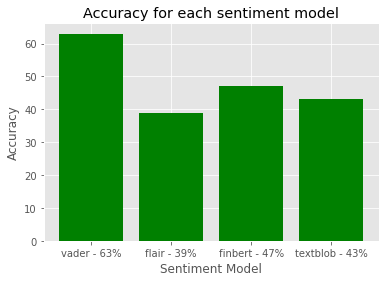

In [ ]:
def getPer(x):
  return str(x) +'%'

corrects = [vader_c, flair_c, finbert_c, textblob_c]
x = ['vader - ' + getPer(vader_c), 'flair - '+ getPer(flair_c), 'finbert - '+ getPer(finbert_c), 'textblob - '+ getPer(textblob_c)]
targets =[vader_tar, flair_tar, finbert_tar, textblob_tar]

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
#corrects = [5, 6, 15, 22, 24, 8]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, corrects, color='green')
plt.xlabel("Sentiment Model")
plt.ylabel("Accuracy")
plt.title("Accuracy for each sentiment model")

plt.xticks(x_pos, x)

plt.show()
# for i in range(len(names)):
#   target = pd.Series(targets[i]).value_counts()
#   fig = go.Figure()
#   fig.add_trace(go.Bar(
#       x=[1,-1],
#       y=target,
#       marker_color=['red','Green'],
#       text=[str(100-corrects[i]) + '%', str(corrects[i]) + '%'],
#       textposition='outside',
#   ))
#   fig.update_layout(
#       title= names[i] + ' Predictions', 
#       yaxis_title='Count',
#       )
#   fig.show()

In [ ]:
import random 
upper = random.randint(101, len(tweets_2019))
lower = upper - 100

for i in range(lower,upper):
  print(i)


Using hand written sentences

In [ ]:
negative_sentences = ['$MSFT will drop tommorow',
                      'prepare for $MSFT to fall downnnn',
                      'cant say that $MSFT will rocket in the future days',
                      'I suggest that you sell every single $MSFT stock that you own',
                      'I am trying to short $MSFT',
                      'How great! $MSFT is going down in price just as i hoped!',
                      'I would suggest that everyone sells their $MSFT shares',
                      '$MSFT - Sell right now!'
                      ]

positive_sentences = ['cant say that $MSFT will drop in the future days',
                      '$MSFT will definetly rise',
                      '$MSFT, will rocket!!!',
                      '$MSFT Buy Buy Buy!!!',
                      'I am really dissapointed that $MSFT is actually rocketing in price',
                      'In my opinion $MSFT will go up',
                      'I am gonna buy $MSFT shares',
                      'Do not sell $MSFT shares',
                      'About $MSFT, hold your shares!!'
                     ]

In [ ]:
# finbert
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sentences = positive_sentences
inputs = tokenizer(sentences, return_tensors="pt", padding=True)
outputs = finbert(**inputs)[0]

labels = {0:'neutral', 1:'positive',2:'negative'}
for idx, sent in enumerate(sentences):
    print(sent, '----', labels[np.argmax(outputs.detach().numpy()[idx])])

In [ ]:


vader_correct = 0
vader_right = []
vader_wrong = []
flair_correct = 0
flair_right = []
flair_wrong = []

print('NEGATIVES')
for neg in negative_sentences:
  s = vaderSentiment(neg)
  if s < 0:
    vader_correct+=1
    print('vader knew " ' + neg + ' " was negative, ' + str(s))
  else: print('vader thought " ' + neg + ' " was positive, ' + str(s))
  s = flairSentiment(neg)
  if s < 0:
    flair_correct+=1
    print('flair knew " ' + neg + ' " was negative, ' + str(s))
  else: print('flair thought " ' + neg + ' " was positive, ' + str(s))
print()
print('POSITIVES')
for pos in positive_sentences:
  s = vaderSentiment(pos)
  if s > 0:
    vader_correct+=1
    print('vader knew " ' + pos + ' " was positive, ' + str(s))
  else: print('vader thought " ' + pos + ' " was negative, ' + str(s))
  s = flairSentiment(pos)
  if s > 0:
    flair_correct+=1
    print('flair knew " ' + pos + ' " was positive, ' + str(s))
  else: print('flair thought " ' + pos + ' " was negative, ' + str(s))

print('vader accuracy = ' + str(vader_correct/ (len(negative_sentences)+len(positive_sentences)) ))
print('flair accuracy = ' + str(flair_correct/ (len(negative_sentences)+len(positive_sentences)) ))



NEGATIVES
vader knew " $MSFT will drop tommorow " was negative, -0.2732
flair knew " $MSFT will drop tommorow " was negative, -0.9999430179595947
vader thought " prepare for $MSFT to fall downnnn " was positive, 0.0
flair knew " prepare for $MSFT to fall downnnn " was negative, -0.999751627445221
vader thought " cant say that $MSFT will rocket in the future days " was positive, 0.0
flair knew " cant say that $MSFT will rocket in the future days " was negative, -0.9920113682746887
vader thought " I suggest that you sell every single $MSFT stock that you own " was positive, 0.0
flair knew " I suggest that you sell every single $MSFT stock that you own " was negative, -0.9993230104446411
vader thought " I am trying to short $MSFT " was positive, 0.0
flair knew " I am trying to short $MSFT " was negative, -0.99930739402771
vader thought " How great! $MSFT is going down in price just as i hoped! " was positive, 0.8065
flair thought " How great! $MSFT is going down in price just as i hoped! 

Using Financial sentences with sentiment

In [ ]:
file_path = '/content/drive/MyDrive/Final Project/Data/From the Web/BOW/FinancialPhraseBank-v1.0/Sentences_50Agree.txt'
with open(file_path, 'r', encoding='latin-1') as f:
    lines = f.readlines()

texts = []
sentiments = []
for line in lines:
  splitted = line.split('@')
  splitted[1] = splitted[1].replace('\n', '')
  texts.append(splitted[0])
  sentiments.append(splitted[1])

print(texts)
print(sentiments)

['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', 'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .', 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .', 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .', "According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .", "FINANCING OF ASPOCOMP 'S

In [ ]:
finance_sentiments_df = pd.DataFrame(data={'text' : texts, 'actual_sentiment' : sentiments})
finance_sentiments_df

,text,actual_sentiment
0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .",neutral
1,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",neutral
2,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",negative
3,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,positive
4,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",positive
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,negative
4842,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .",neutral
4843,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .",negative
4844,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .",negative


In [ ]:
finance_sentiments_df['predicted_sentiment_score'] = [0 for i in range(len(finance_sentiments_df))]
finance_sentiments_df['predicted_sentiment_score'] = finance_sentiments_df['predicted_sentiment_score'].astype(float)


# using flair sentiment

# thresholds for neg pos (mostly for flair- it does not give neutral preds)
upper_bound = 0.9
lower_bound = -0.9

for i in range(len(finance_sentiments_df)):
  try:
    print(i)
    finance_sentiments_df['predicted_sentiment_score'][i] = flairSentiment(finance_sentiments_df['text'][i])
  except AttributeError as ex:
    print(i)
    print(ex)
    finance_sentiments_df['predicted_sentiment_score'][i] = -2
    continue

finance_sentiments_df['predicted_sentiment'] = ['' for i in range(len(finance_sentiments_df))]

for i in range(len(finance_sentiments_df)):
  if finance_sentiments_df['predicted_sentiment_score'][i] > upper_bound:
    finance_sentiments_df['predicted_sentiment'][i] = 'positive'
  elif finance_sentiments_df['predicted_sentiment_score'][i] < lower_bound:
    finance_sentiments_df['predicted_sentiment'][i]= 'negative'
  else:# finance_sentiments_df['predicted_sentiment_score'][i] == 0:
    finance_sentiments_df['predicted_sentiment'][i] = 'neutral'
  # else:
  #   finance_sentiments_df['predicted_sentiment'][i] = 'failed_to_compute'

correct_rows_count = 0
incorrect_rows = []
# get accuracy
for i in range(len(finance_sentiments_df)):
  if (finance_sentiments_df['predicted_sentiment'][i] == finance_sentiments_df['actual_sentiment'][i]):
    correct_rows_count += 1
    incorrect_rows.append(False)
  else:
    incorrect_rows.append(True)

print('accuracy = ' + str( round((correct_rows_count/len(finance_sentiments_df))*100,2) ))

# for i in range(len(finance_sentiments_df)):
#   if incorrect_rows[i]:
#     print('Text\n' + finance_sentiments_df['text'][i] + '\nPrediction= ' + finance_sentiments_df['predicted_sentiment'])

finance_sentiments_df[incorrect_rows]

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
sentences = texts[400:500]
inputs = tokenizer(sentences, return_tensors="pt", padding=True)
outputs = finbert(**inputs)[0]
labels = {0:'neutral', 1:'positive',2:'negative'}
corrects = 0
for idx, sent in enumerate(sentences):
  sentiment = labels[np.argmax(outputs.detach().numpy()[idx])]
  if sentiment == sentiments[idx]:
    corrects+=1
print(corrects)

26


In [ ]:
finbertSentiment('i am happy')

'positive'

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

i = 100
total = 0

while i <= len(texts):
  sentences = texts[i-100:i]
  i += 100
  total += 100


  inputs = tokenizer(sentences, return_tensors="pt", padding=True)
  outputs = finbert(**inputs)[0]

  #corrects = 0
  labels = {0:'neutral', 1:'positive',2:'negative'}
  for idx, sent in enumerate(sentences):
    sentiment = labels[np.argmax(outputs.detach().numpy()[idx])]

    
    if sentiment == sentiments[idx]:
      corrects+=1
  #print(corrects)

print(corrects/total)

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sentences = [
             'bad day i am really sad 1',
             'really happy 2'
]

inputs = tokenizer(sentences, return_tensors="pt", padding=True)
outputs = finbert(**inputs)[0]
scores=[]
#corrects = 0
labels = {0:'neutral', 1:'positive',2:'negative'}
for idx, sent in enumerate(sentences):
  print(idx, sent)
  sentiment = labels[np.argmax(outputs.detach().numpy()[idx])]
  scores.append(sentiment)
scores

0 bad day i am really sad 1
1 really happy 2


['negative', 'positive']

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sentences = [
             'bad day i am really sad 1',
             'really happy 2'
]


text1 = 'bad day i am really sad 1'
text2 = 'really happy 2'
inputs = tokenizer(text2, return_tensors="pt", padding=True)
outputs = finbert(**inputs)[0]
scores=[]
#corrects = 0
labels = {0:'neutral', 1:'positive',2:'negative'}
sentiment = labels[np.argmax(outputs.detach().numpy()[0])]
scores.append(sentiment)
scores

['positive']

In [ ]:
print(np.argmax(outputs.detach().numpy()[0]), outputs.detach().numpy()[0])

1 [-5.0841603  8.447478  -5.1637607]


In [ ]:
# np.argmax(outputs.detach().numpy()[2])
# outputs.detach().numpy()[2]
len(texts[:2500])

2500

# TESTS


In [ ]:
merged_df

,ticker_symbol,Date,tweet_id,post_date,comment_num,retweet_num,like_num,Negativity,Positivity,Neutral,Compound,Tweet_Score,Tweet_Score_Scaled,Open,Close,price_difference,behaviour,id,id_str,followers_count,favourites_count,listed_count,friends_count,statuses_count,verified,eng_total_retweets,eng_total_likes,eng_tweets_length,empty_tweets_apiCall,User_Score,Total_Score
0,AAPL,01/04/2019,1.112740e+18,1.554133e+09,3.750000,5.750000,38.250000,0.109000,0.042500,0.848500,-0.145750,13.375000,0.013600,47.772499,48.505001,0.407604,1.0,2.089961e+17,2.089961e+17,9.353900e+04,6782.500000,1504.000000,2147.750000,31793.000000,0.250000,1131.750000,6886.000000,1131.750000,1.0,0.000419,-1.636684
1,AAPL,01/05/2019,1.123569e+18,1.556715e+09,10.275862,14.655172,58.275862,0.081483,0.150138,0.768345,0.176503,24.465517,0.035540,52.459999,52.287498,0.092014,1.0,9.914758e+08,9.914758e+08,1.042531e+06,44587.413793,7460.655172,1431.413793,100448.344828,0.551724,2311.655172,16090.896552,2311.655172,1.0,0.000359,9.441653
2,AAPL,01/07/2019,1.145752e+18,1.562004e+09,4.666667,8.166667,27.833333,0.073000,0.118000,0.808833,0.163083,12.208333,0.011292,50.352501,50.682499,0.285931,1.0,1.865539e+17,1.865539e+17,1.491490e+05,37331.333333,1911.166667,4376.000000,60721.000000,0.500000,909.166667,12447.833333,909.166667,1.0,0.000214,2.415082
3,AAPL,01/08/2019,1.156874e+18,1.564655e+09,6.833333,18.333333,35.000000,0.086667,0.072333,0.841000,-0.041450,19.625000,0.025964,51.382500,51.005001,-0.139163,-1.0,1.525973e+09,1.525973e+09,5.443767e+04,35090.500000,1742.666667,2833.166667,53518.166667,0.500000,1174.000000,4311.500000,1174.000000,1.0,0.000850,1.254690
4,AAPL,01/10/2019,1.178967e+18,1.569923e+09,3.400000,13.200000,38.400000,0.090600,0.115400,0.794000,0.235640,17.050000,0.020870,55.764999,54.740002,-0.231939,-1.0,1.517959e+09,1.517959e+09,9.769408e+05,9229.600000,9218.200000,373.800000,138656.000000,0.600000,4194.000000,14076.400000,4194.000000,1.0,0.000542,3.062012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,TSLA,30/12/2019,1.211645e+18,1.577714e+09,8.363636,17.441558,74.636364,0.096584,0.102143,0.801234,0.006495,29.470779,0.045442,81.000000,83.666000,0.081177,1.0,5.677569e+17,5.677569e+17,6.315364e+04,73514.480519,460.571429,1724.207792,40299.545455,0.064935,771.402597,9163.558442,771.402597,1.0,0.001408,5.531645
1198,TSLA,31/01/2019,1.091084e+18,1.548970e+09,7.333333,10.555556,76.166667,0.121889,0.104556,0.773611,-0.116911,26.152778,0.038878,61.084000,62.442001,0.115825,1.0,4.067167e+17,4.067167e+17,3.063350e+04,67728.722222,469.666667,1579.444444,41634.222222,0.333333,379.666667,4892.833333,379.666667,1.0,0.001432,6.119954
1199,TSLA,31/03/2019,1.112326e+18,1.554034e+09,5.836364,10.272727,75.454545,0.067055,0.125818,0.807145,0.080053,25.459091,0.037506,56.523998,57.835999,0.207551,1.0,5.797484e+17,5.797484e+17,2.999225e+04,57954.836364,375.636364,1421.945455,42353.018182,0.054545,595.600000,7137.109091,595.600000,1.0,0.001484,6.902052
1200,TSLA,31/07/2019,1.156553e+18,1.564579e+09,5.483333,11.566667,81.750000,0.079550,0.107067,0.813383,0.116967,27.591667,0.041724,48.529999,46.770000,-0.171793,-1.0,4.381546e+17,4.381546e+17,4.425633e+04,90152.950000,410.733333,1660.600000,42082.233333,0.033333,727.100000,9031.066667,727.100000,1.0,0.001121,2.367649


In [ ]:
import csv
#export to csv
compression_opts = dict(method='zip',
                        archive_name='users_with_eng_v3.csv')  
users_df.to_csv('users_with_eng_v3.zip', index=False,
          compression=compression_opts)

In [ ]:
tweet = twitterAPI.get_status('1478414796835934209')


In [ ]:
tweet._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Jan 04 17:15:29 +0000 2022',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 5402612,
    'id_str': '5402612',
    'indices': [0, 12],
    'name': 'BBC Breaking News',
    'screen_name': 'BBCBreaking'}]},
 'favorite_count': 20,
 'favorited': False,
 'geo': None,
 'id': 1478414796835934209,
 'id_str': '1478414796835934209',
 'in_reply_to_screen_name': 'BBCBreaking',
 'in_reply_to_status_id': 1478414312872067082,
 'in_reply_to_status_id_str': '1478414312872067082',
 'in_reply_to_user_id': 5402612,
 'in_reply_to_user_id_str': '5402612',
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 2,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'text': "@BBCBreaking I'll just inform the nearest shelter and food bank about this. They'll be so happy.",
 'truncated': False,
 'user': {'contributors_en

In [ ]:
cleanEngScore(users_df)



len before = 2452
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'temp'
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



could not convert string to float: 'temp'
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'temp'
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'temp'
could not convert string to float: 'Not authorized.'
could not convert string to float: "[{'message': 'Rate limit exceeded', 'code': 88}]"
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'Not authorized.'
could not convert string to float: 'temp'
could not convert string to float: 'N

inf

In [ ]:
users_df['eng_score'].max()

inf

**bold text**#TEMP
- Merged_df - get dummy vars
- Merged_df - get X and y (for model)
- Merged_df - split the data (X_train, y_train, X_test, y_test)
- Merged_df - scale the data

Try "blind" accuracy (without any model)

In [ ]:
test_df = pd.DataFrame()
test_df['pred'] = ['Up' if x > 0 else 'Down' for x in merged_df['Total_Score']]
test_df['actual'] = ['Up' if x == 1 else 'Down' for x in merged_df['behaviour']]
correct_rows = 0
for i in range(len(test_df)):
  if test_df['pred'][i] == test_df['actual'][i]:
    correct_rows+=1

accuracy = correct_rows/len(test_df)
accuracy    


0.5267584097859327

Get X and y

In [ ]:
# X = merged_df[['comment_num', 'retweet_num', 'like_num', 'Compound']] # Features
# y = merged_df[['Down', 'Up']] # Prediction

In [ ]:
X = merged_df[['Total_Score']]
y = merged_df[['behaviour']]

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
# Standard Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

#X_train_scaled

**NEURAL NETWORK**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_data = '/content/drive/MyDrive/Alon/לימודים/Final Project/Data/From the Web/NeuralNetworkTest/training.1600000.processed.noemoticon.csv'
training_data

'/content/drive/MyDrive/Alon/לימודים/Final Project/Data/From the Web/NeuralNetworkTest/training.1600000.processed.noemoticon.csv'

In [ ]:
data = pd.read_csv(training_data,engine = 'python')
data.columns = ['label', 'time', 'date', 'query','username','text']
data.tail(10)

In [ ]:
data = data[['text','label']]
data['label'][data['label']==4]==1
data_pos = data[data['label']==1]
data_neg = data[data['label']==0]

data = pd.concat([data_pos,data_neg])
data['text'] = data['text'].str.lower()
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_lst = stopwords.words('english')
", ".join(stopwords_lst)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
#remove the stopwords from the texts
def clean_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stopwords_lst])

data['text'] =   data['text'].apply(lambda text : clean_stopwords(text))
data['text'].head()


0    upset can't update facebook texting it... migh...
1    @kenichan dived many times ball. managed save ...
2                     whole body feels itchy like fire
3    @nationwideclass no, behaving all. i'm mad. he...
4                                 @kwesidei whole crew
Name: text, dtype: object

In [ ]:
#removing punctuations
punctuations = string.punctuation
def clean_punctuation(text):
  translator = str.maketrans('', '' ,punctuations)
  return text.translate(translator)
data['text']= data['text'].apply(lambda x: clean_punctuation(x))
data['text'].tail()  


799994    sick spending day laying bed listening taylors...
799995                                           gmail down
799996                                rest peace farrah sad
799997    ericurbane sounds like rival flagging ads much...
799998    resit exams summer wishes worked harder first ...
Name: text, dtype: object

In [ ]:
#cleaning repeating characters
def remove_repeats(text):
  return  re.sub(r'(.)\1+', r'\1', text)
data['text']= data['text'].apply(lambda x: remove_repeats(x))
data['text'].tail()  


799994    sick spending day laying bed listening taylors...
799995                                           gmail down
799996                                 rest peace farah sad
799997    ericurbane sounds like rival flaging ads much ...
799998    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
#clean email data
def clean_email(data):
  return re.sub('@[^\s]+', ' ', data)
data['text']= data['text'].apply(lambda x: clean_email(x))
data['text'].tail()    

799994    sick spending day laying bed listening taylors...
799995                                           gmail down
799996                                 rest peace farah sad
799997    ericurbane sounds like rival flaging ads much ...
799998    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
#clean urls
def clean_urls(data):
  return re.sub('((www\.[^\s]+) | (https?://[^\s]))', ' ', data)
data['text']= data['text'].apply(lambda x: clean_urls(x))
data['text'].tail()     

799994    sick spending day laying bed listening taylors...
799995                                           gmail down
799996                                 rest peace farah sad
799997    ericurbane sounds like rival flaging ads much ...
799998    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
#clean numeric numbers
def clean_numbers(data):
  return re.sub('[0-9]+', ' ', data)
data['text']= data['text'].apply(lambda x: clean_numbers(x))
data['text'].tail()  

799994    sick spending day laying bed listening taylors...
799995                                           gmail down
799996                                 rest peace farah sad
799997    ericurbane sounds like rival flaging ads much ...
799998    resit exams sumer wishes worked harder first y...
Name: text, dtype: object

In [ ]:
#get tokenization of tweet text
tokenizer = RegexpTokenizer(r'\w+')
data['text']= data['text'].apply(tokenizer.tokenize)
data['text'].tail()  

799994    [sick, spending, day, laying, bed, listening, ...
799995                                        [gmail, down]
799996                            [rest, peace, farah, sad]
799997    [ericurbane, sounds, like, rival, flaging, ads...
799998    [resit, exams, sumer, wishes, worked, harder, ...
Name: text, dtype: object

In [ ]:
#apply stemming and lemmatizer
#stemming
import nltk
st = nltk.PorterStemmer()
def stemming(data):
  text = [st.stem(word) for word in data]
  return data
data['text'] = data['text'].apply(lambda x: stemming(x))

#lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer(data):
  text = [lm.lemmatize(word) for word in data]
  return data
data['text'] = data['text'].apply(lambda x: lemmatizer(x))
data['text'].tail(10)